# Analyses of fingerprints

In [1]:
prefix = '/home/ines/repositories/'
prefix = '/Users/ineslaranjeira/Documents/Repositories/'

In [2]:
""" 
IMPORTS
"""
import os
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# --Machine learning and statistics

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,  LabelBinarizer
import umap
from sklearn import mixture
import pickle
from scipy.stats import mode
from sklearn.metrics.pairwise import pairwise_distances
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import cosine
from sklearn.decomposition import PCA
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.spatial import distance_matrix, distance

# Get my functions
functions_path =  prefix + 'representation_learning_variability/Functions/'
os.chdir(functions_path)
# from data_processing import save_and_log
functions_path =  prefix + 'representation_learning_variability/Models/Sub-trial//2_fit_models/'
os.chdir(functions_path)
from preprocessing_functions import idxs_from_files
functions_path =  prefix + 'representation_learning_variability/Models/Sub-trial/4_analyses/5_clustering_analyses/'
os.chdir(functions_path)
# from clustering_functions import calculate_entropy
functions_path =  prefix + 'representation_learning_variability/Models/Sub-trial//3_postprocess_results/'
os.chdir(functions_path)
from plotting_functions import create_grouped_gradient_palette
from one.api import ONE
one = ONE(mode='remote')

In [3]:
data_path = prefix + 'representation_learning_variability/paper-individuality/fig1_segmentation/'
# states_file = pd.read_parquet(data_path+'states_trial_type_5k_5_09-24-2025')
states_file = pd.read_parquet(data_path+'states_trial_type_09-29-2025')

In [14]:
from scipy.stats import zscore
session_data.groupby(['mouse_name', 'session', 'identifiable_states', 'most_likely_states'])[['l_paw_x', 'l_paw_y', 'r_paw_x', 'r_paw_y']].apply(lambda x : zscore(x)).reset_index()

mouse_name                               session identifiable_states  \
                                                                          
                                                                          
                                                                          
0   ZFM-02372  88224abb-5746-431f-9c17-17d7ef806e6a                 000   
1   ZFM-02372  88224abb-5746-431f-9c17-17d7ef806e6a                 010   
2   ZFM-02372  88224abb-5746-431f-9c17-17d7ef806e6a                 100   
3   ZFM-02372  88224abb-5746-431f-9c17-17d7ef806e6a                 101   
4   ZFM-02372  88224abb-5746-431f-9c17-17d7ef806e6a                 110   
5   ZFM-02372  88224abb-5746-431f-9c17-17d7ef806e6a                 111   
6   ZFM-02372  88224abb-5746-431f-9c17-17d7ef806e6a                 200   
7   ZFM-02372  88224abb-5746-431f-9c17-17d7ef806e6a                 210   
8   ZFM-02372  88224abb-5746-431f-9c17-17d7ef806e6a                 211   
9   ZFM-02372  88224abb-5746-431f-9c17-17d7ef806e6a                 300   
10  ZFM-02372  88224abb-5746-431f-9c17-17d7ef806e6a                 301   
11  ZFM-02372  88224abb-5746-431f-9c17-17d7ef806e6a                 310   
12  ZFM-02372  88224abb-5746-431f-9c17-17d7ef806e6a                 311   
13  ZFM-02372  88224abb-5746-431f-9c17-17d7ef806e6a                 400   
14  ZFM-02372  88224abb-5746-431f-9c17-17d7ef806e6a                 410   
15  ZFM-02372  88224abb-5746-431f-9c17-17d7ef806e6a                 411   
16  ZFM-02372  88224abb-5746-431f-9c17-17d7ef806e6a                 500   
17  ZFM-02372  88224abb-5746-431f-9c17-17d7ef806e6a                 510   
18  ZFM-02372  88224abb-5746-431f-9c17-17d7ef806e6a                 511   
19  ZFM-02372  88224abb-5746-431f-9c17-17d7ef806e6a                 600   
20  ZFM-02372  88224abb-5746-431f-9c17-17d7ef806e6a                 610   
21  ZFM-02372  88224abb-5746-431f-9c17-17d7ef806e6a                 611   
22  ZFM-02372  88224abb-5746-431f-9c17-17d7ef806e6a                 700   
23  ZFM-02372  88224abb-5746-431f-9c17-17d7ef806e6a                 710   
24  ZFM-02372  88224abb-5746-431f-9c17-17d7ef806e6a                 711   

   most_likely_states                                            l_paw_x  
                                                                 l_paw_y  
                                                                 r_paw_x  
                                                                 r_paw_y  
0                 0.0  [[0.6665012162320979, -0.20345071723717398, -0...  
1                 8.0  [[0.06710747285105731, -1.1655436934708996, -0...  
2                 1.0  [[0.29532535270741517, -0.5233689071650848, -2...  
3                17.0  [[1.4376846655356885, 1.1975144709750989, 0.60...  
4                 9.0  [[0.08645314115795101, -0.891781302337148, -2....  
5                25.0  [[0.6733071841700992, -2.823404565507568, -3.0...  
6                 2.0  [[0.7725821332404514, 0.24138836983306125, -0....  
7                10.0  [[0.4457829787017948, -2.329923129386485, -3.2...  
8                26.0  [[-0.9261809991267499, 0.9572934786878218, 0.3...  
9                 3.0  [[0.8621506111264742, 1.2627480995744496, 0.04...  
10               19.0  [[0.01580486007058115, 1.03828928171602, -1.12...  
11               11.0  [[-0.05421370631304822, -0.9968948431282509, -...  
12               27.0  [[0.6695119577317593, 0.49080670735227644, 1.1...  
13                4.0  [[1.8644704692557554, 0.3165540884248515, 0.09...  
14               12.0  [[1.9713562176981696, 0.47605330656064493, 0.2...  
15               28.0  [[1.2019408177354565, -1.0424829196827405, -1....  
16                5.0  [[-0.7575011719413586, -0.5686103746930579, 0....  
17               13.0  [[-0.08165034925509541, -0.07630868656746713, ...  
18               29.0  [[0.325486049944335, 0.6379693909776145, 1.093...  
19                6.0  [[-0.875147179311158, -0.941354357240305, 0.20...  
20               14.0  [[-1

In [ ]:
sessions = states_file['session'].unique()
trial_movement = pd.DataFrame()
for s, session in enumerate(sessions[:1]):
    
    session_data = states_file.loc[states_file['session']==session]
    
    wheel = pd.DataFrame(session_data.groupby(['session', 'trial_id', 'broader_label'])['avg_wheel_vel'].apply(lambda x: np.nanmean(np.abs(x)))).reset_index()
    l_paw_x = pd.DataFrame(session_data.groupby(['session', 'trial_id', 'broader_label'])['l_paw_x'].apply(lambda x: np.nanmean(np.abs(np.diff(x/2))))).reset_index()
    l_paw_y = pd.DataFrame(session_data.groupby(['session', 'trial_id', 'broader_label'])['l_paw_y'].apply(lambda x: np.nanmean(np.abs(np.diff(x/2))))).reset_index()
    r_paw_x = pd.DataFrame(session_data.groupby(['session', 'trial_id', 'broader_label'])['r_paw_x'].apply(lambda x: np.nanmean(np.abs(np.diff(x))))).reset_index()
    r_paw_y = pd.DataFrame(session_data.groupby(['session', 'trial_id', 'broader_label'])['r_paw_y'].apply(lambda x: np.nanmean(np.abs(np.diff(x))))).reset_index()
    
    trial_df = wheel.merge(l_paw_x, on=['session', 'trial_id', 'broader_label'])
    trial_df = trial_df.merge(l_paw_y, on=['session', 'trial_id', 'broader_label'])
    trial_df = trial_df.merge(r_paw_x, on=['session', 'trial_id', 'broader_label'])
    trial_df = trial_df.merge(r_paw_y, on=['session', 'trial_id', 'broader_label'])
    
    if s == 0:
        trial_movement = trial_df.copy()
    else:
        trial_movement = pd.concat((trial_movement, trial_df.copy()))

In [4]:
sessions = states_file['session'].unique()
trial_movement = pd.DataFrame()
for s, session in enumerate(sessions[:1]):
    
    session_data = states_file.loc[states_file['session']==session]
    
    wheel = pd.DataFrame(session_data.groupby(['session', 'trial_id', 'broader_label'])['avg_wheel_vel'].apply(lambda x: np.nanmean(np.abs(x)))).reset_index()
    l_paw_x = pd.DataFrame(session_data.groupby(['session', 'trial_id', 'broader_label'])['l_paw_x'].apply(lambda x: np.nanmean(np.abs(np.diff(x/2))))).reset_index()
    l_paw_y = pd.DataFrame(session_data.groupby(['session', 'trial_id', 'broader_label'])['l_paw_y'].apply(lambda x: np.nanmean(np.abs(np.diff(x/2))))).reset_index()
    r_paw_x = pd.DataFrame(session_data.groupby(['session', 'trial_id', 'broader_label'])['r_paw_x'].apply(lambda x: np.nanmean(np.abs(np.diff(x))))).reset_index()
    r_paw_y = pd.DataFrame(session_data.groupby(['session', 'trial_id', 'broader_label'])['r_paw_y'].apply(lambda x: np.nanmean(np.abs(np.diff(x))))).reset_index()
    
    trial_df = wheel.merge(l_paw_x, on=['session', 'trial_id', 'broader_label'])
    trial_df = trial_df.merge(l_paw_y, on=['session', 'trial_id', 'broader_label'])
    trial_df = trial_df.merge(r_paw_x, on=['session', 'trial_id', 'broader_label'])
    trial_df = trial_df.merge(r_paw_y, on=['session', 'trial_id', 'broader_label'])
    
    if s == 0:
        trial_movement = trial_df.copy()
    else:
        trial_movement = pd.concat((trial_movement, trial_df.copy()))


In [5]:
trial_movement

session  trial_id   broader_label  \
0     88224abb-5746-431f-9c17-17d7ef806e6a       1.0          Choice   
1     88224abb-5746-431f-9c17-17d7ef806e6a       1.0             ITI   
2     88224abb-5746-431f-9c17-17d7ef806e6a       1.0  Pre-quiescence   
3     88224abb-5746-431f-9c17-17d7ef806e6a       1.0      Quiescence   
4     88224abb-5746-431f-9c17-17d7ef806e6a       2.0          Choice   
...                                    ...       ...             ...   
1791  88224abb-5746-431f-9c17-17d7ef806e6a     449.0      Quiescence   
1792  88224abb-5746-431f-9c17-17d7ef806e6a     450.0          Choice   
1793  88224abb-5746-431f-9c17-17d7ef806e6a     450.0             ITI   
1794  88224abb-5746-431f-9c17-17d7ef806e6a     450.0  Pre-quiescence   
1795  88224abb-5746-431f-9c17-17d7ef806e6a     450.0      Quiescence   

      avg_wheel_vel   l_paw_x   l_paw_y   r_paw_x   r_paw_y  
0          1.109659  3.331041  2.386579  5.260989  4.588364  
1          0.604995  2.466494  1.707907  3.431990  2.679568  
2          1.370951  3.722044  3.819265  5.275407  4.057897  
3          0.005433  0.050022  0.026917  0.059969  0.093946  
4          0.973396  3.621725  3.354195  8.003984  3.619524  
...             ...       ...       ...       ...       ...  
1791       0.007684  0.065037  0.081011  0.049154  0.030910  
1792       0.039129  0.200092  0.197454  0.261286  0.213649  
1793       0.439986  2.215155  2.359403  3.708317  2.504406  
1794       0.163099  0.234831  0.445341  0.221323  0.079211  
1795       0.023315  0.093917  0.096807  0.109868  0.045697  

[1796 rows x 8 columns]

In [12]:
data_path = prefix + 'representation_learning_variability/paper-individuality/fig4_clustering/'
trial_movement.reset_index().to_parquet(data_path+'trial_movements')

## Load datasets

In [4]:
data_path = prefix + 'representation_learning_variability/paper-individuality/fig1_segmentation/'
# filename = str(data_path + 'all_sequences_09-29-2025')
# states = pd.read_parquet(filename)
# filename = str(data_path + 'trial_clusters_5')
# trial_clusters_df = pd.read_parquet(filename)
data_path = prefix + 'representation_learning_variability/paper-individuality/fig4_clustering/'
cluster_df = pd.read_parquet(data_path+'cluster_per_session')

# high_streteotypy_mice = pd.read_parquet(data_path+'high_stereo_mice')
# mice_to_keep = high_streteotypy_mice['mouse_name'].unique()

data_path = prefix + 'representation_learning_variability/paper-individuality/fig4_clustering/'
trial_movement = pd.read_parquet(data_path+'trial_movements')


In [6]:
melted_movements = pd.melt(trial_movement, id_vars=['trial_id', 'session', 'broader_label'], value_vars=['avg_wheel_vel', 'l_paw_x',
       'l_paw_y', 'r_paw_x', 'r_paw_y'])

<Axes: xlabel='broader_label', ylabel='value'>

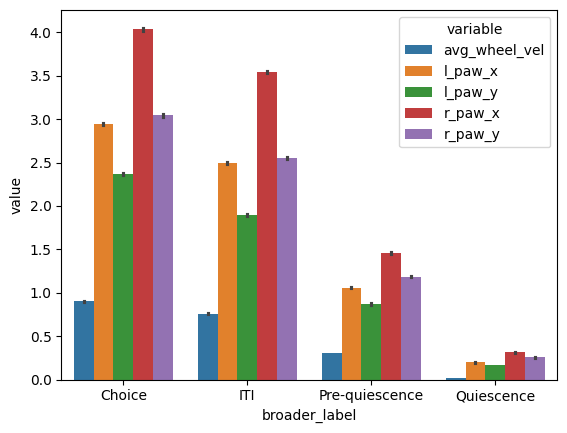

In [7]:
sns.barplot(x='broader_label', y='value', hue='variable', data=melted_movements)

In [5]:
melted_movements = pd.melt(trial_movement, id_vars=['trial_id', 'session', 'broader_label'], value_vars=['l_paw_x',  'r_paw_x'])
merged_movements = melted_movements.merge(cluster_df[['session', 'session_cluster']], on=['session'])

melted_movements = pd.melt(trial_movement, id_vars=['trial_id', 'session', 'broader_label'], value_vars=['avg_wheel_vel'])
merged_movements = melted_movements.merge(cluster_df[['session', 'session_cluster']], on=['session'])

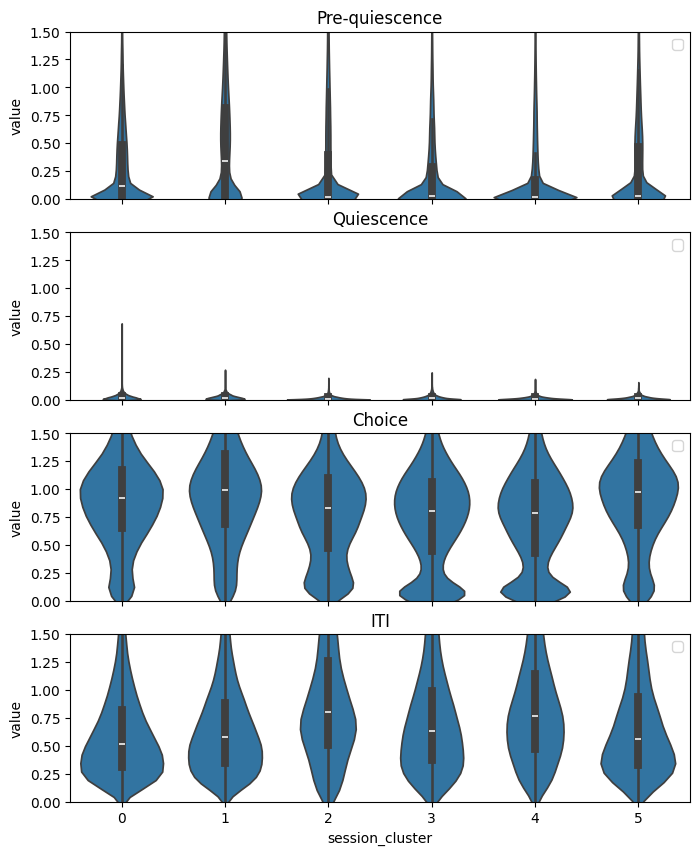

In [7]:
epochs = merged_movements['broader_label'].unique()
epochs = ['Pre-quiescence', 'Quiescence', 'Choice', 'ITI']
fig, axs = plt.subplots(4, 1, sharex=True, sharey=True, figsize=(8, 10))

for e, epoch in enumerate(epochs):
    use_data = merged_movements.loc[merged_movements['broader_label']==epoch]
    sns.violinplot(x='session_cluster', y='value', hue='variable', ax=axs[e], data=use_data)
    axs[e].set_title(epoch)
    axs[e].set_ylim([0, 1.5])
    axs[e].legend('')

In [8]:
simpler_mapping = {0.0: 0.0,
        1.0:0,
        2.0:1,
        3.0:1,
        4.0:1,
        5.0:2,
        6.0:3,
        7.0:4,
        
        8.0:5,
        9.0:5,
        10.0:6,
        11.0:6,
        12.0:6,
        13.0:7,
        14.0:8,
        15.0:9,

        16.0:10,
        17.0:10,
        18.0:11,
        19.0:11, 
        20.0:11, 
        21.0:12, 
        22.0:13, 
        23.0:14, 

        24.0:15,
        25.0:15,
        26.0:16,
        27.0:16,
        28.0:16,
        29.0:17,
        30.0:18,
        31.0:19,
        }

replace_func = np.vectorize(simpler_mapping.get)

simpler_identifiable_mapping = {'000': 0.0,
           '100': 0.0,
           '200': 1.0,
           '300': 1.0,
           '400': 1.0,
           '500': 2.0,
           '600': 3.0,
           '700': 4.0,
           
           '010': 5.0,
           '110': 5.0,
           '210': 6.0,
           '310': 6.0,
           '410': 6.0,
           '510': 7.0,
           '610': 8.0,
           '710': 9.0,

           '001': 10.0,
           '101': 10.0,
           '201': 11.0,
           '301': 11.0, 
           '401': 11.0, 
           '501': 12.0, 
           '601': 13.0, 
           '701': 14.0, 

           '011': 15.0,
           '111': 15.0,
           '211': 16.0,
           '311': 16.0,
           '411': 16.0,
           '511': 17.0,
           '611': 18.0,
           '711': 19.0,
           'nan': np.nan
           }
replace_func_identifiable = np.vectorize(simpler_identifiable_mapping.get)

simpler_mapping = {'0': '0',
        '1':'0',
        '2':'1',
        '3':'1',
        '4':'1',
        '5':'2',
        '6':'3',
        '7':'4'
        }

replace_func = np.vectorize(simpler_mapping.get)

In [9]:
state_triplet = states_file['identifiable_states'].copy()
states_file['paw_states'] = replace_func([s[0] for s in state_triplet])


In [10]:
states_epoch = states_file.groupby(['session', 'trial_id', 'broader_label'])['paw_states'].value_counts(normalize=True).rename('fraction').reset_index()
merged_states = states_epoch.merge(cluster_df[['session', 'session_cluster']], on=['session'])

In [11]:
merged_states = merged_states.groupby(['session', 'broader_label', 'session_cluster', 'paw_states'])['fraction'].median().reset_index()

In [13]:
palette_30 = create_grouped_gradient_palette(n_groups=8, shades_per_group=1, base_palette='Set1')
palette_30_list = [palette_30(i) for i in range(palette_30.N)]  # Extract colors properly

/tmp/ipykernel_3421/3896934688.py:7: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(hue='paw_states', y='fraction', x='broader_label', ax=axs[c],
/tmp/ipykernel_3421/3896934688.py:7: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(hue='paw_states', y='fraction', x='broader_label', ax=axs[c],
/tmp/ipykernel_3421/3896934688.py:7: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(hue='paw_states', y='fraction', x='broader_label', ax=axs[c],
/tmp/ipykernel_3421/3896934688.py:7: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(hue='paw_states', y='fraction', x='broader_label', ax=axs[c],
/tmp/ipykernel_3421/3896934688.py:7: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(hue='paw_states', y='fracti

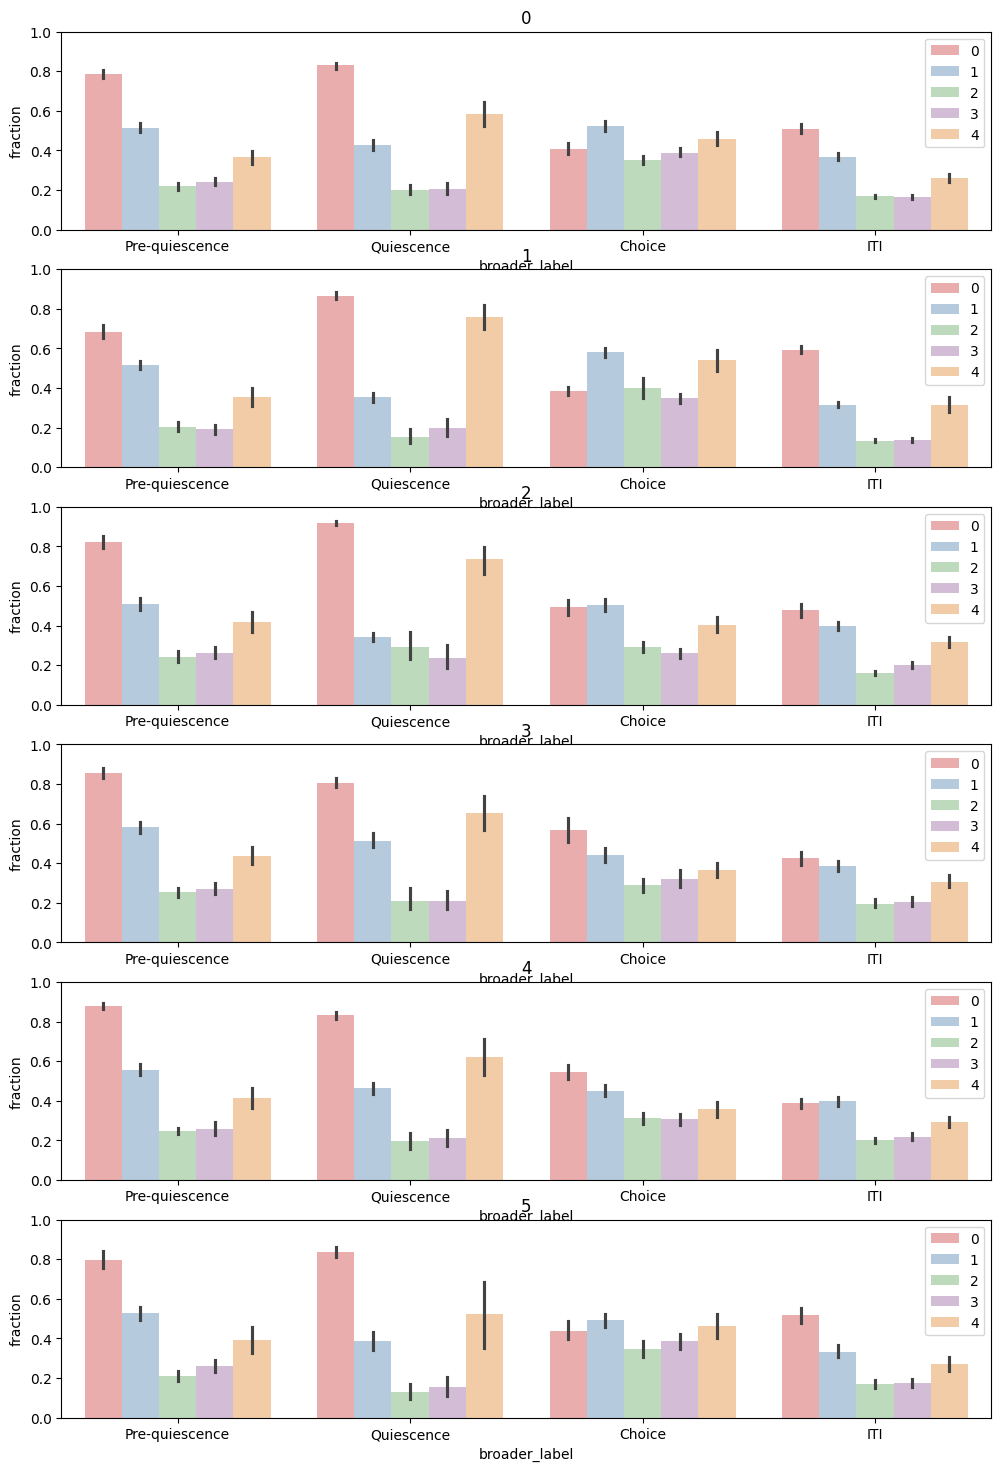

In [22]:
epochs = ['Pre-quiescence', 'Quiescence', 'Choice', 'ITI']
session_clusters = np.arange(0, 6, 1)
fig, axs = plt.subplots(6, 1, sharex=False, sharey=True, figsize=(12, 18))

for c, clust in enumerate(session_clusters):
    use_data = merged_states.loc[merged_states['session_cluster']==clust]
    sns.barplot(hue='paw_states', y='fraction', x='broader_label', ax=axs[c], 
                   palette=palette_30_list, hue_order=['0', '1', '2', '3', '4'], order=epochs, data=use_data) #, estimator='mean')
    axs[c].set_title(session_clusters[c])
    axs[c].set_ylim([0, 1])
    axs[c].legend()

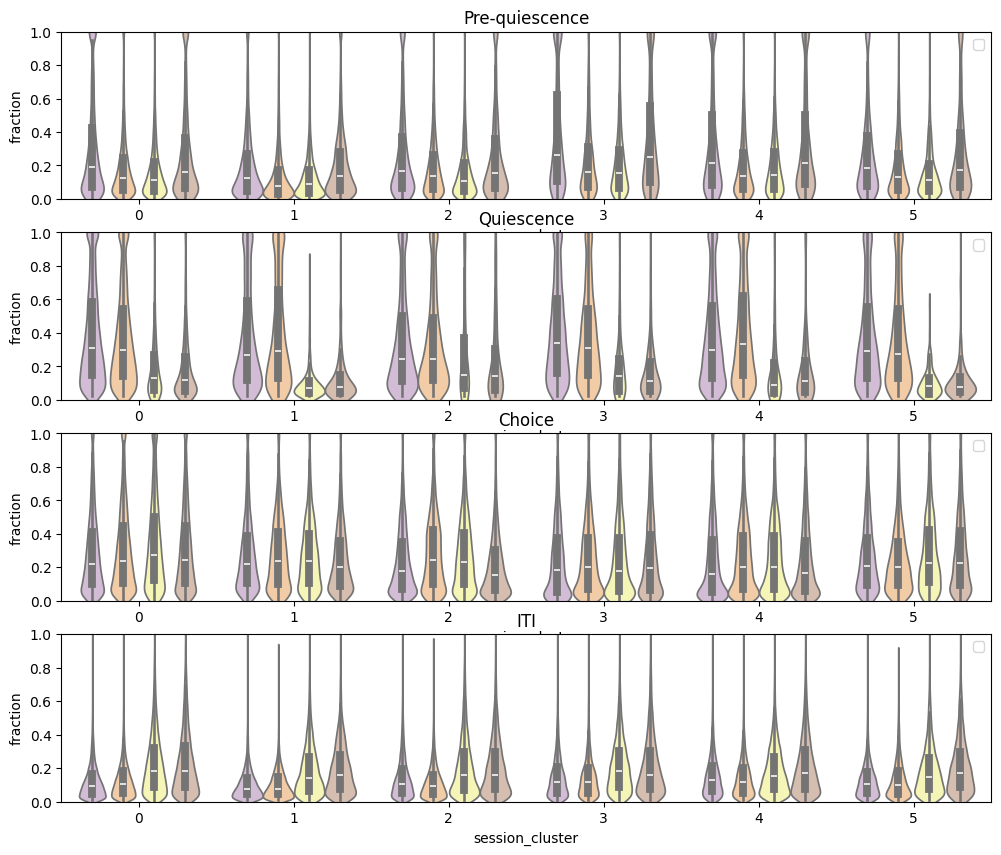

In [61]:
epochs = ['Pre-quiescence', 'Quiescence', 'Choice', 'ITI']
session_clusters = np.arange(0, 6, 1)
fig, axs = plt.subplots(4, 1, sharex=False, sharey=True, figsize=(12, 10))

for c, clust in enumerate(epochs):
    use_data = merged_states.loc[(merged_states['broader_label']==clust)
                                 & (merged_states['paw_states'].isin(['3', '4', '5', '6']))]
    sns.violinplot(x='session_cluster', y='fraction', hue='paw_states', ax=axs[c], 
                   palette=[palette_30_list[3], palette_30_list[4], palette_30_list[5], palette_30_list[6]], order=session_clusters, data=use_data)
    axs[c].set_title(epochs[c])
    axs[c].set_ylim([0, 1])
    axs[c].legend('')

/tmp/ipykernel_21392/545373096.py:8: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.violinplot(x='broader_label', y='fraction', hue='paw_states', ax=axs[c],
/tmp/ipykernel_21392/545373096.py:8: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.violinplot(x='broader_label', y='fraction', hue='paw_states', ax=axs[c],
/tmp/ipykernel_21392/545373096.py:8: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.violinplot(x='broader_label', y='fraction', hue='paw_states', ax=axs[c],
/tmp/ipykernel_21392/545373096.py:8: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.violinplot(x='broader_label', y='fraction', hue='paw_states', ax=axs[c],
/tmp/ipykernel_21392/545373096.py:8: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.violinplot(x='broader_l

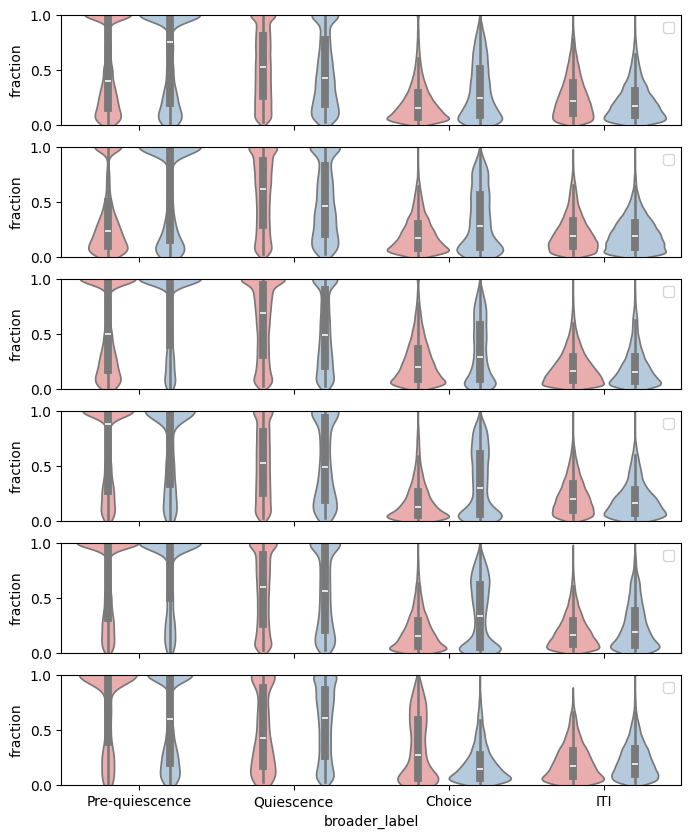

In [44]:
epochs = ['Pre-quiescence', 'Quiescence', 'Choice', 'ITI']
session_clusters = np.arange(0, 6, 1)
fig, axs = plt.subplots(6, 1, sharex=True, sharey=True, figsize=(8, 10))

for c, clust in enumerate(session_clusters):
    use_data = merged_states.loc[(merged_states['session_cluster']==clust)
                                 & (merged_states['paw_states'].isin(['0', '1']))]
    sns.violinplot(x='broader_label', y='fraction', hue='paw_states', ax=axs[c], 
                   palette=palette_30_list, order=epochs, data=use_data)
    # axs[c].set_title(epoch)
    axs[c].set_ylim([0, 1])
    axs[c].legend('')

In [4]:
def expand_from_trial_type(df):
    
    df['feedback'] = df['trial_type'].str.split().str[:1].str.join('')
    df['choice'] = df['trial_type'].str.split().str[3:4].str.join('')
    df['block'] = df['trial_type'].str.split().str[2:3].str.join('')
    df['contrast'] = df['trial_type'].str.split().str[1:2].str.join('')
    df['side'] = df['choice'].copy()
    df.loc[(df['feedback']=='correct') & (df['choice']=='right'), 'side'] = 'left'
    df.loc[(df['feedback']=='correct') & (df['choice']=='left'), 'side'] = 'right'
    df['session'] = df['sample'].str.split().str[:1].str.join('')
    df['trial_id'] = df['sample'].str.split().str[1:2].str.join('')
    df['contrast'] = df['contrast'].astype(float)
    df['block'] = df['block'].astype(float)
    df['choice'] = df['trial_type'].str.split().str[3:4].str.join('')
    df.loc[df['choice']=='left', 'choice'] = 0
    df.loc[df['choice']=='right', 'choice'] = 1
    df.loc[df['feedback']=='correct', 'feedback'] = 1
    df.loc[df['feedback']=='incorrect', 'feedback'] = 0
    
    return df

def group_by_var_interest(session_syllables, var_interest, use_states):

    session_syllables = session_syllables.groupby(['mouse_name', 'session', 'session_cluster', var_interest])[np.arange(0, np.shape(final_matrix)[1], 1)].mean().reset_index()
    
    timesteps = 40
    reshaped_probs = pd.DataFrame()
    clusters = session_syllables['session_cluster'].copy()
    v_int = session_syllables[var_interest].copy()

    for i, interest in enumerate(np.unique(v_int)):
        for c, cluster in enumerate(np.unique(clusters)):
            reshaped_probs_cluster = pd.DataFrame(columns=['syllable', 'timestep', 'cluster', 'prob', var_interest], index=range(use_states * timesteps))
            indices = np.where((session_syllables['session_cluster']==cluster) & (session_syllables[var_interest]==interest))[0]
            syllable_prob = np.array(session_syllables[session_syllables.keys()[4:]])[indices, :].mean(axis=0)

            for t in range(timesteps):
                reshaped_probs_cluster['syllable'][t*use_states:(t+1)*use_states] = ['000', '100', '200', '300', '400', '500', '600', '700', '010', '110',
                            '210', '310', '410', '510', '610', '710', '001', '101', '201', '301', '401', '501', '601', '701', '011',
                            '111', '211', '311', '411', '511',  '611',  '711']
                reshaped_probs_cluster['timestep'][t*use_states:(t+1)*use_states] = t
                reshaped_probs_cluster['prob'][t*use_states:(t+1)*use_states] = syllable_prob[t*use_states:(t+1)*use_states]
                reshaped_probs_cluster['cluster'][t*use_states:(t+1)*use_states] = cluster
                reshaped_probs_cluster[var_interest][t*use_states:(t+1)*use_states] = interest
            # Save
            reshaped_probs = pd.concat([reshaped_probs, reshaped_probs_cluster])
            
    return reshaped_probs

def group_by_cluster(session_syllables, use_states):

    session_syllables = session_syllables.groupby(['mouse_name', 'session', 'session_cluster'])[np.arange(0, np.shape(final_matrix)[1], 1)].mean().reset_index()
    
    timesteps = 40
    reshaped_probs = pd.DataFrame()
    clusters = session_syllables['session_cluster'].copy()

    for c, cluster in enumerate(np.unique(clusters)):
        reshaped_probs_cluster = pd.DataFrame(columns=['syllable', 'timestep', 'cluster', 'prob'], index=range(use_states * timesteps))
        indices = np.where((session_syllables['session_cluster']==cluster))[0]
        syllable_prob = np.array(session_syllables[session_syllables.keys()[3:]])[indices, :].mean(axis=0)

        for t in range(timesteps):
            reshaped_probs_cluster['syllable'][t*use_states:(t+1)*use_states] = ['000', '100', '200', '300', '400', '500', '600', '700', '010', '110',
                        '210', '310', '410', '510', '610', '710', '001', '101', '201', '301', '401', '501', '601', '701', '011',
                        '111', '211', '311', '411', '511',  '611',  '711']
            reshaped_probs_cluster['timestep'][t*use_states:(t+1)*use_states] = t
            reshaped_probs_cluster['prob'][t*use_states:(t+1)*use_states] = syllable_prob[t*use_states:(t+1)*use_states]
            reshaped_probs_cluster['cluster'][t*use_states:(t+1)*use_states] = cluster
        # Save
        reshaped_probs = pd.concat([reshaped_probs, reshaped_probs_cluster])
            
    return reshaped_probs

## Get sequences per trial

In [7]:
var_interest = 'block'
var_interest = ''
if len(var_interest) > 0:
    pivoted_df = complete_df.pivot(index=['sample', 'trial_type', 'mouse_name', 'session', var_interest], columns=['broader_label'], values='binned_sequence').reset_index().dropna()
else:
    pivoted_df = complete_df.pivot(index=['sample', 'trial_type', 'mouse_name', 'session'], columns=['broader_label'], values='binned_sequence').reset_index().dropna()
pivoted_df = pivoted_df.merge(cluster_df[['mouse_name', 'session', 'session_cluster']], on=['mouse_name', 'session'])

In [8]:
epoch_to_analyse = ['Pre-quiescence', 'Quiescence', 'Choice', 'ITI']

sequences_choice = np.vstack(pivoted_df[epoch_to_analyse].apply(lambda row: np.hstack(row), axis=1))  # Transpose to get the right shape
use_sequences = sequences_choice[~np.isnan(sequences_choice).any(axis=1)]

use_states = int(max(np.unique(use_sequences)))+1
timesteps = np.shape(use_sequences)[1]
binarized = np.zeros((np.shape(use_sequences)[0], timesteps*use_states))

for t in range(timesteps):
    label_binarizer = LabelBinarizer()
    label_binarizer.fit(range(use_states))
    encoded_arr = label_binarizer.transform(use_sequences[:, t])
    binarized[:, t*use_states:(t+1)*use_states] = encoded_arr

final_matrix = binarized.copy()

In [9]:

session_syllables = pd.DataFrame(final_matrix)
session_syllables['session'] = pivoted_df['session'].copy()
session_syllables['session_cluster'] = pivoted_df['session_cluster'].copy()
session_syllables['mouse_name'] = pivoted_df['mouse_name'].copy()
use_states = len(np.unique(sequences_choice))

if len(var_interest) > 0:
    session_syllables[var_interest] = pivoted_df[var_interest].copy()
    reshaped_probs = group_by_var_interest(session_syllables, var_interest, use_states)
else:
    reshaped_probs = group_by_cluster(session_syllables, use_states)
clusters = cluster_df['session_cluster']

/tmp/ipykernel_4316/1370012801.py:64: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  reshaped_probs_cluster['syllable'][t*use_states:(t+1)*use_states] = ['000', '100', '200', '300', '400', '500', '600', '700', '010', '110',
/tmp/ipykernel_431

In [10]:
order = ['000', '010', '001', '011', '100', '110', '101', '111', '200', '210', '201', '211',
         '300', '310', '301', '311', '400', '410',  '401', '411',
         '500', '510', '501', '511', '600', '610', '601', '611',
         '700', '710', '701', '711']
labels = ['VL00', 'VL10', 'VL01', 'VL11', 'Low00', 'Low10',  'Low01', 'Low11',
         'Lowish00', 'Lowish10', 'Lowish01', 'Lowish11', 
         'LL-00', 'LL-10', 'LL-01', 'LL-11', 'LR-00', 'LR-10', 'LR-01', 'LR-11', 
         'HL-00', 'HL-10', 'HL-01', 'HL-11', 'HR-00', 'HR-10', 'HR-01', 'HR-11', 
         'H-00', 'H-10', 'H-01', 'H-11']
rename_labels = dict(zip(np.array(order), np.array(labels)))
rename_func = np.vectorize(rename_labels.get)

In [11]:
palette_30 = create_grouped_gradient_palette(n_groups=8, shades_per_group=4, base_palette='Set1')
palette_30_list = [palette_30(i) for i in range(palette_30.N)]  # Extract colors properly

palette_16 = create_grouped_gradient_palette(n_groups=2, shades_per_group=4, base_palette='Set1')
palette_16_list = [palette_16(i) for i in range(palette_16.N)]  # Extract colors properly
state_to_color = dict(zip(order, palette_16_list))

/tmp/ipykernel_4316/1847124971.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_data['syllable'] = rename_func(use_data['syllable'])
/tmp/ipykernel_4316/1847124971.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_data['syllable'] = rename_func(use_data['syllable'])
/tmp/ipykernel_4316/1847124971.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

IndexError: list index out of range

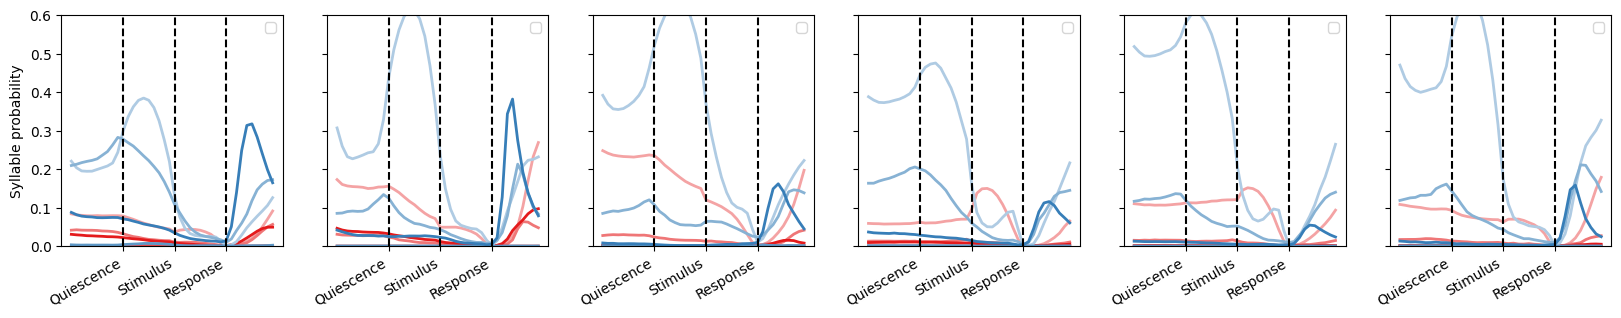

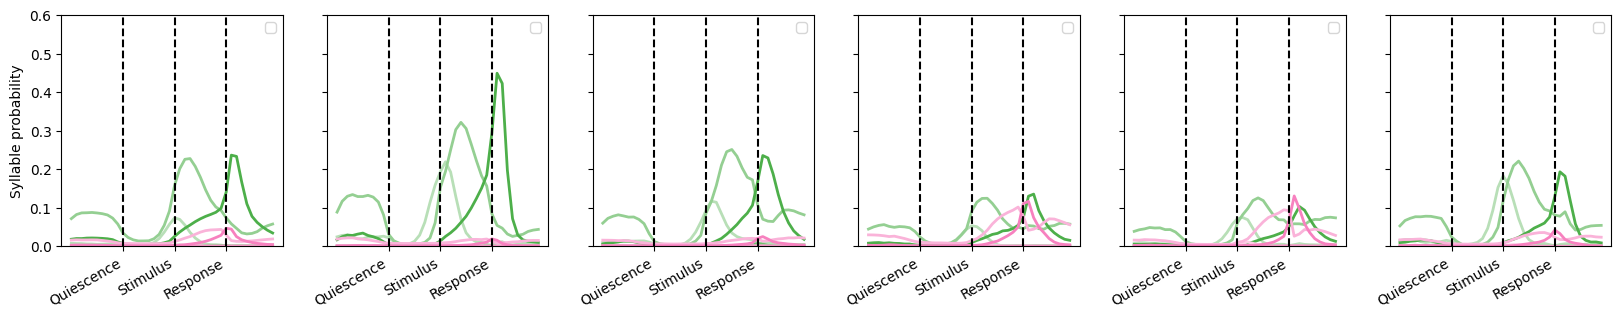

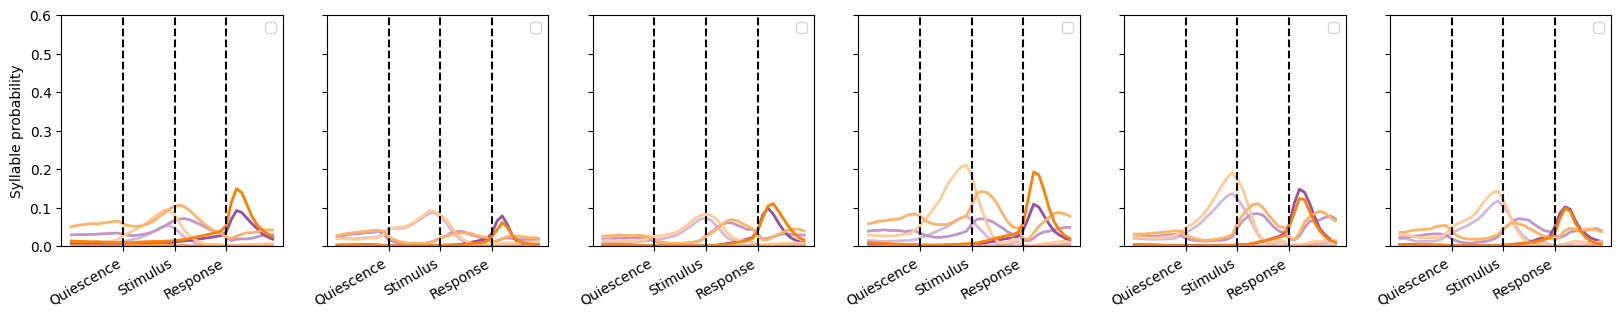

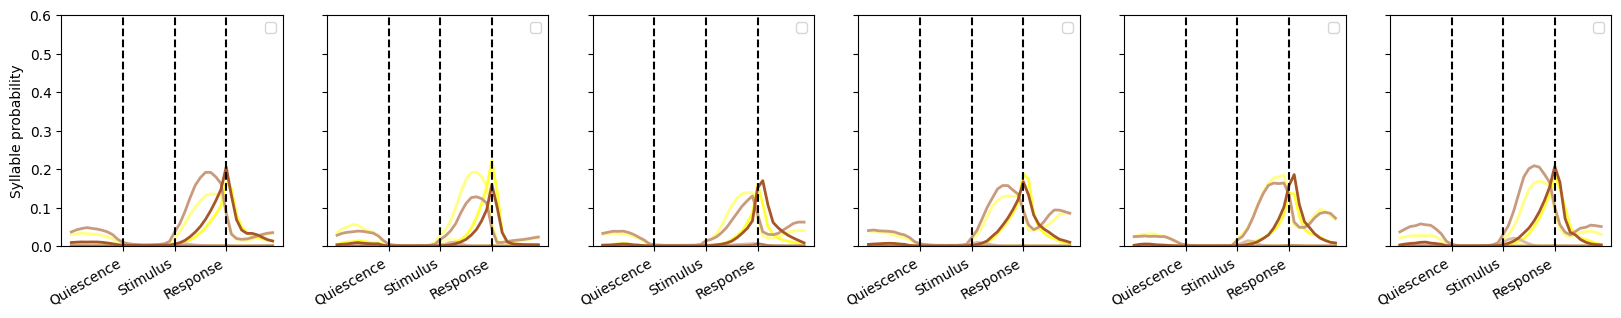

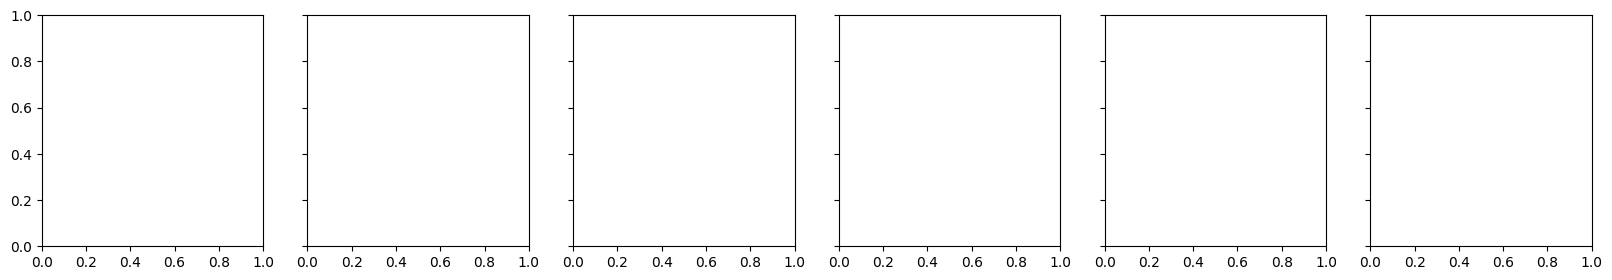

In [12]:
paw_syllable = [['VL00', 'VL10', 'VL01', 'VL11',
                'Low00', 'Low10',  'Low01', 'Low11'],
                ['Lowish00', 'Lowish10', 'Lowish01', 'Lowish11', 'H-00', 'H-10', 'H-01', 'H-11'],
                ['LL-00', 'LL-10', 'LL-01', 'LL-11', 'LR-00', 'LR-10', 'LR-01', 'LR-11'],
                ['HL-00', 'HL-10', 'HL-01', 'HL-11', 'HR-00', 'HR-10', 'HR-01', 'HR-11'],
                
                ]
for i in range(6):

    fig, axs = plt.subplots(1, 6, sharex=True, sharey=True, figsize=(20, 3))

    for c, cluster in enumerate(np.unique(clusters)):
        use_data = reshaped_probs.loc[reshaped_probs['cluster']==cluster]
        use_data['syllable'] = rename_func(use_data['syllable'])
        use_syllables = paw_syllable[i]
        use_data = use_data.loc[use_data['syllable'].isin(use_syllables)]
        sns.lineplot(x='timestep', y='prob', hue='syllable', data=use_data, 
                    ax=axs[c], palette=palette_30_list, hue_order=labels, linewidth=2)  #  legend=labels[c]  style=var_interest,

        axs[c].axvline(x=10, color='k', linestyle='--')
        axs[c].axvline(x=20, color='k', linestyle='--')
        axs[c].axvline(x=30, color='k', linestyle='--')
        axs[c].set_ylabel('Syllable probability')
        axs[c].set_xlabel('')
        axs[c].set_ylim([0, 0.6])
        axs[c].set_xticks(np.arange(10, 31, 10), ['Quiescence', 'Stimulus', 'Response'], rotation=30, ha='right')
        axs[c].legend('')
axs[c].legend(loc='upper left', bbox_to_anchor=(1.1, 1))

# Plot statistics per fingerprint

In [13]:
trials_df = complete_df.drop(columns=['broader_label', 'binned_sequence']).drop_duplicates()
# trials_df = trials_df.merge(cluster_df[['mouse_name', 'session', 'session_cluster']], on=['mouse_name', 'session'])


In [14]:
# Get timing info
data_path = prefix + 'representation_learning_variability/paper-individuality/fig1_segmentation/'
states_file = pd.read_parquet(data_path+'states_trial_type_09-29-2025')
vars = ['trial_id', 'session', 'mouse_name']
elongation = pd.DataFrame(states_file.groupby(vars)['elongation'].mean()).reset_index()
elongation['trial_id'] = elongation['trial_id'].astype(str)
response = pd.DataFrame(states_file.groupby(vars)['response'].mean()).reset_index()
response['trial_id'] = response['trial_id'].astype(str)
reaction = pd.DataFrame(states_file.groupby(vars)['reaction'].mean()).reset_index()
reaction['trial_id'] = reaction['trial_id'].astype(str)

del states_file

# Merge
trials_df = trials_df.merge(elongation, on=['session', 'trial_id', 'mouse_name'])
trials_df = trials_df.merge(response, on=['session', 'trial_id', 'mouse_name'])
trials_df = trials_df.merge(reaction, on=['session', 'trial_id', 'mouse_name'])

In [15]:
data_path = prefix + 'representation_learning_variability/DATA/'
# data_path =  '/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/DATA/'
learning_df = pd.read_csv(data_path+'learning_private_one.csv')
learning_times = learning_df[['subject_nickname', 'training_time']].drop_duplicates()
learning_times = learning_times.rename(columns={"subject_nickname": "mouse_name"}).reset_index()
plt.scatter(X_pca[:, 0], a['feedback'])ns={"subject_nickname": "mouse_name"}).reset_index()

# new_df = design_df.droplevel(1, axis=1)[['mouse_name', 'session']]
# df = new_df.merge(learning_times, on='mouse_name')
a = learning_times.merge(learning_times_new, on='mouse_name', how='outer')
b = a.loc[a['training_time_x'].isna()]
b = b.rename(columns={"training_time_y": "training_time"}).reset_index()

full_learning = pd.concat([learning_times[['mouse_name', 'training_time']], b[['mouse_name', 'training_time']]]).reset_index()

/tmp/ipykernel_4316/1096352341.py:3: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  learning_df = pd.read_csv(data_path+'learning_private_one.csv')


In [16]:
trials_df = trials_df.merge(full_learning[['mouse_name', 'training_time']], on='mouse_name')

In [1]:
# --Machine learning and statistics
from scipy.stats import ttest_ind
from sklearn.metrics import f1_score
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
import scikit_posthocs as sp
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats

var_1 = 'training_time ~ session_cluster'
var = 'training_time'
var = 'choice'
var_1 = 'choice ~ session_cluster'

data = pd.DataFrame(trials_df.groupby(['mouse_name', 'session', 'session_cluster'])[var].mean()).reset_index().dropna()
# data = pd.DataFrame(trials_df.groupby(['mouse_name', 'session_cluster'])[var].mean()).reset_index().dropna()
# data = pd.DataFrame(new_df.groupby(['mouse_name', 'session_cluster'])[var].mean()).reset_index().dropna()
# data = data[['session_cluster', var]]
data[var] = data[var].astype(float)

model = ols(var_1, data=data).fit()

# # Perform the ANOVA
# anova_table = sm.stats.anova_lm(model, typ=2)  # Type 2 ANOVA DataFrame
# # print(anova_table)

# # Perform Tukey's HSD test
# tukey = pairwise_tukeyhsd(endog=data[var], groups=data['session_cluster'], alpha=0.05)
# print(tukey)

plt.rcParams.update({'font.size': 16})
sns.violinplot(x='session_cluster', y=var, data=data, palette=sns.light_palette("seagreen", 3, as_cmap=False))
# sns.barplot(x='session_cluster', y=var, data=data, palette=sns.light_palette("seagreen", 3, as_cmap=False))
# sns.scatterplot(x='part_cluster', y=var, data=data, color='black')
plt.xticks([0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5])
plt.ylim([0, 80])
# plt.ylim([0, 4])
# plt.ylim([0.5, 1])
# plt.ylim([0, 1])
plt.xlabel('Phenotype')
plt.ylabel('Proportion correct')
plt.ylabel('Reaction time (s)')
# plt.ylabel('Training time (sessions)')
plt.show()

group_1 = data.loc[data['session_cluster']==0, var]
group_2 = data.loc[data['session_cluster']==1, var]
group_3 = data.loc[data['session_cluster']==2, var]
group_4 = data.loc[data['session_cluster']==3, var]
group_5 = data.loc[data['session_cluster']==4, var]
group_6 = data.loc[data['session_cluster']==5, var]


stat, p_value = stats.kruskal(group_1, group_2, group_3, group_4, group_5, group_6)


print(f"P-value for KW: {p_value:.3f}")

posthoc = sp.posthoc_dunn(data.dropna(), val_col=var, group_col='session_cluster', p_adjust='bonferroni')
print(posthoc)

NameError: name 'pd' is not defined

## Analyse clusters

(array([73.,  0., 31.,  0., 39.,  0., 24.,  0., 36., 15.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

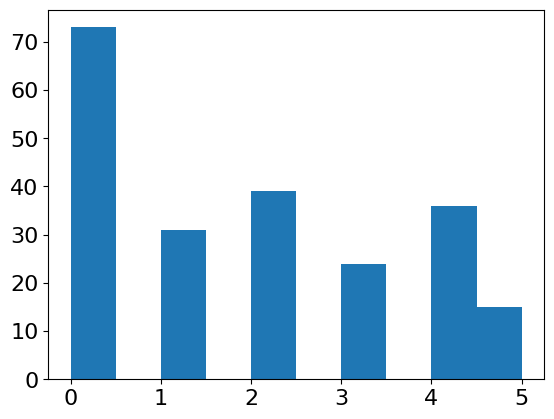

In [28]:
plt.hist(cluster_df['session_cluster'])

In [97]:
clusters = cluster_df['session_cluster']
epoch_to_analyse = ['Pre-quiescence', 'Quiescence', 'Choice', 'ITI']

sequences_choice = np.vstack(design_df[epoch_to_analyse].apply(lambda row: np.hstack(row), axis=1))  # Transpose to get the right shape
use_sequences = sequences_choice[~np.isnan(sequences_choice).any(axis=1)]


In [18]:
use_states = len(np.unique(sequences_choice))
timesteps = 40
reshaped_probs = pd.DataFrame()

for c, cluster in enumerate(np.unique(clusters)):
    reshaped_probs_cluster = pd.DataFrame(columns=['syllable', 'timestep', 'cluster', 'prob'], index=range(use_states * timesteps))
    indices = np.where(clusters==cluster)[0]
    syllable_prob = np.array(cluster_df[cluster_df.keys()[2:-1]])[indices, :].mean(axis=0)

    for t in range(timesteps):
        reshaped_probs_cluster['syllable'][t*use_states:(t+1)*use_states] = ['000', '100', '200', '300', '400', '500', '600', '700', '010', '110',
                     '210', '310', '410', '510', '610', '710', '001', '101', '201', '301', '401', '501', '601', '701', '011',
                     '111', '211', '311', '411', '511',  '611',  '711']
        reshaped_probs_cluster['timestep'][t*use_states:(t+1)*use_states] = t
        reshaped_probs_cluster['prob'][t*use_states:(t+1)*use_states] = syllable_prob[t*use_states:(t+1)*use_states]
        reshaped_probs_cluster['cluster'][t*use_states:(t+1)*use_states] = cluster
    # Save
    reshaped_probs = pd.concat([reshaped_probs, reshaped_probs_cluster])

/tmp/ipykernel_3392/478142897.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  reshaped_probs_cluster['syllable'][t*use_states:(t+1)*use_states] = ['000', '100', '200', '300', '400', '500', '600', '700', '010', '110',
/tmp/ipykernel_3392

In [19]:
order = ['000', '010', '001', '011', '100', '110', '101', '111', '200', '210', '201', '211',
         '300', '310', '301', '311', '400', '410',  '401', '411',
         '500', '510', '501', '511', '600', '610', '601', '611',
         '700', '710', '701', '711']
labels = ['VL00', 'VL10', 'VL01', 'VL11', 'Low00', 'Low10',  'Low01', 'Low11',
         'Lowish00', 'Lowish10', 'Lowish01', 'Lowish11', 
         'LL-00', 'LL-10', 'LL-01', 'LL-11', 'LR-00', 'LR-10', 'LR-01', 'LR-11', 
         'HL-00', 'HL-10', 'HL-01', 'HL-11', 'HR-00', 'HR-10', 'HR-01', 'HR-11', 
         'H-00', 'H-10', 'H-01', 'H-11']
rename_labels = dict(zip(np.array(order), np.array(labels)))
rename_func = np.vectorize(rename_labels.get)

In [36]:
palette_30 = create_grouped_gradient_palette(n_groups=8, shades_per_group=4, base_palette='Set1')
palette_30_list = [palette_30(i) for i in range(palette_30.N)]  # Extract colors properly


/tmp/ipykernel_3392/1005566243.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_data['syllable'] = rename_func(use_data['syllable'])
/tmp/ipykernel_3392/1005566243.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_data['syllable'] = rename_func(use_data['syllable'])
/tmp/ipykernel_3392/1005566243.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

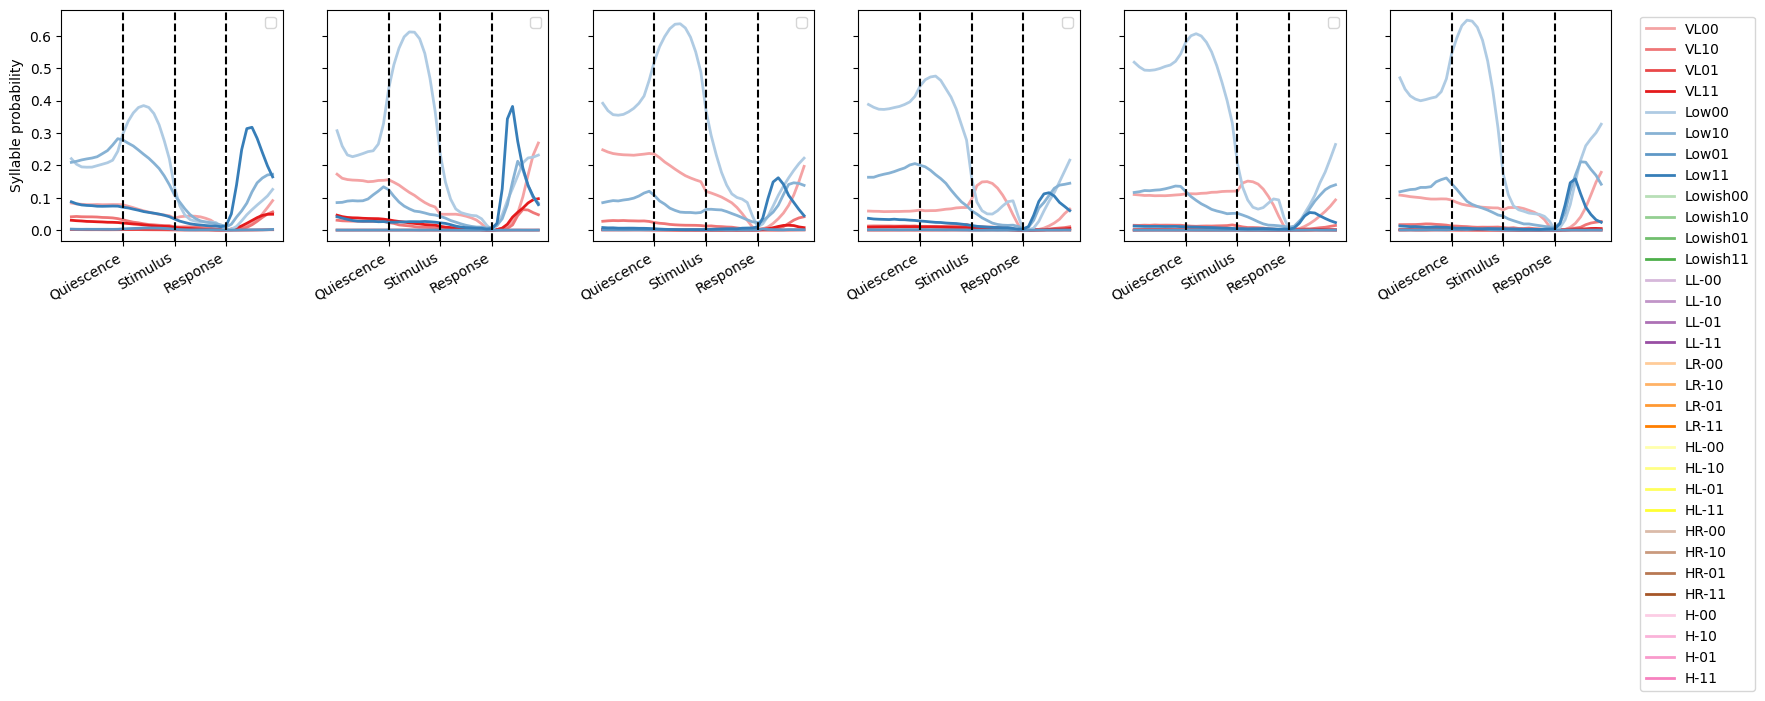

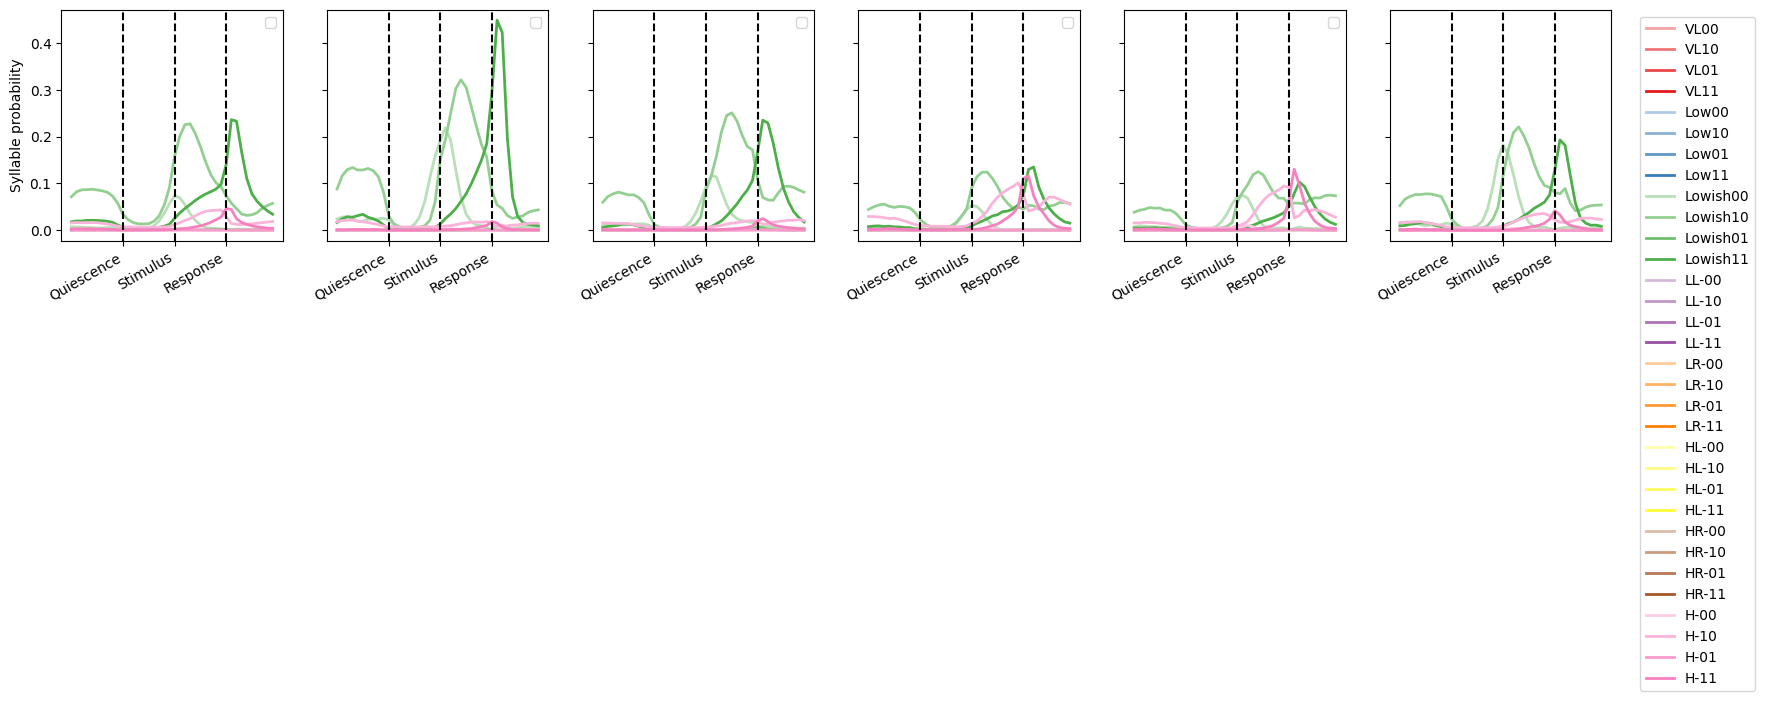

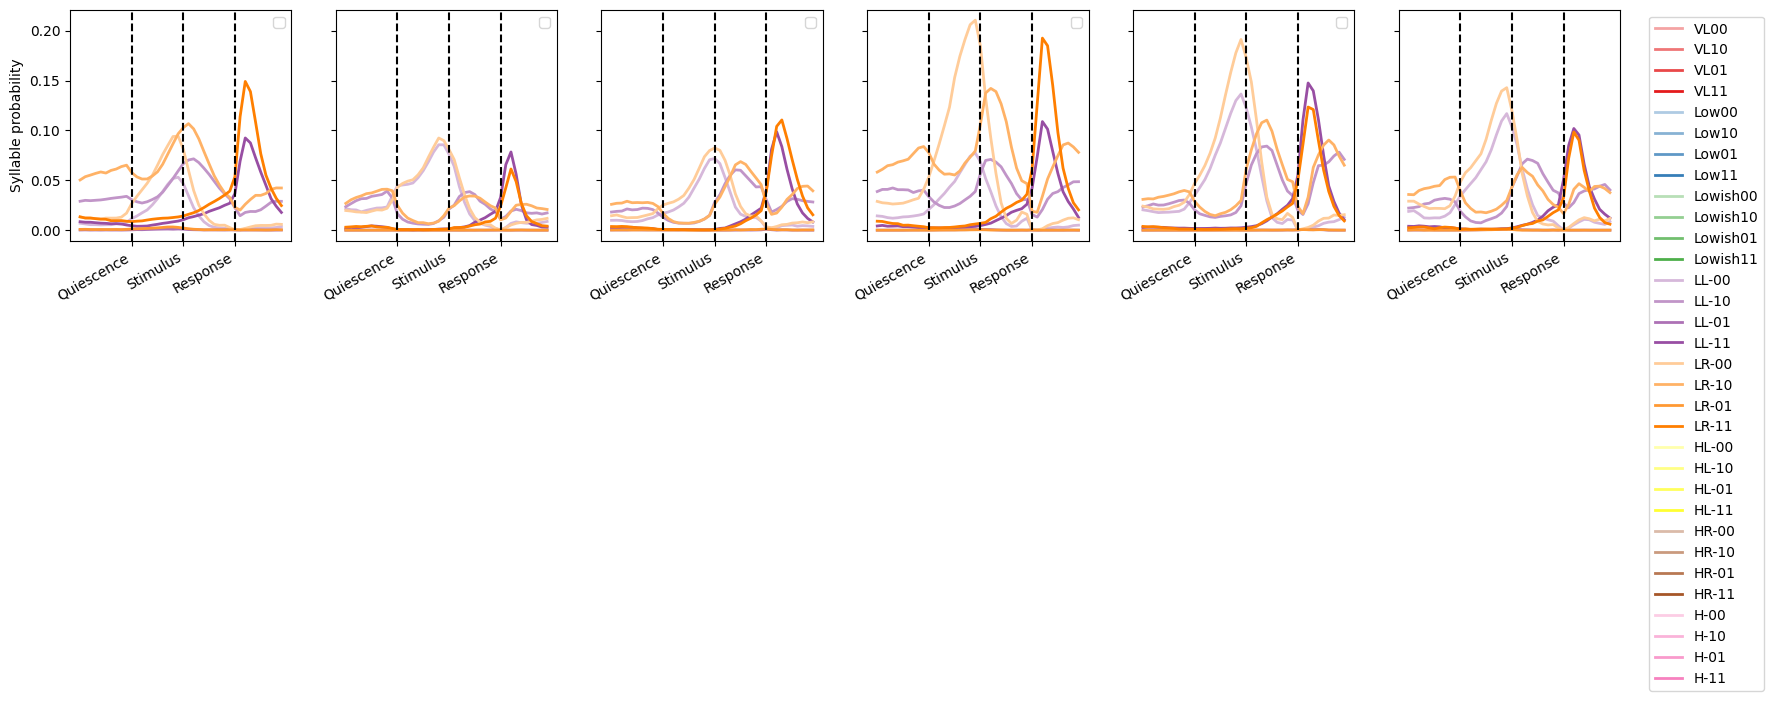

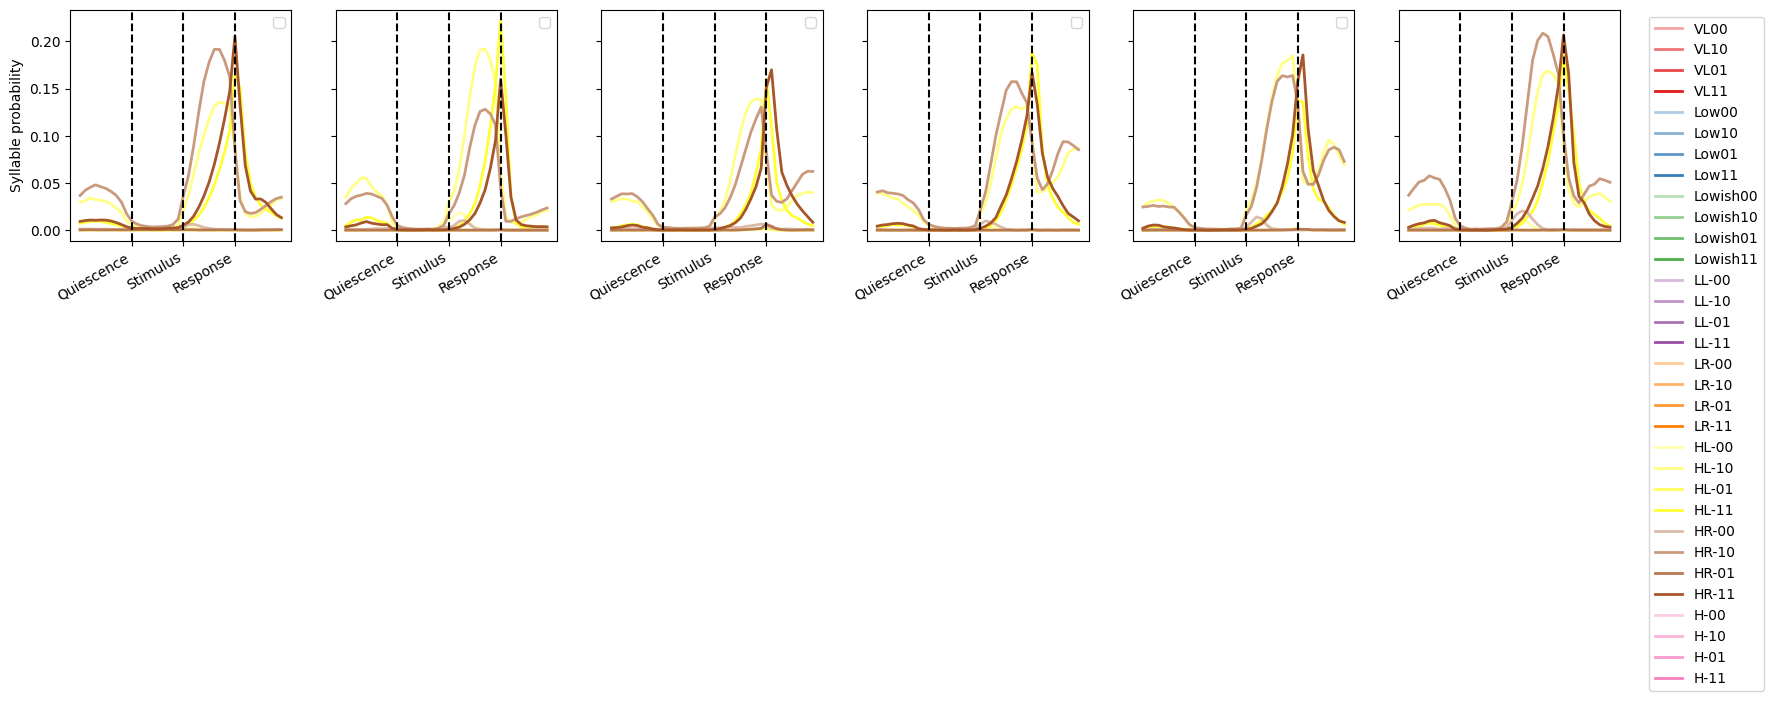

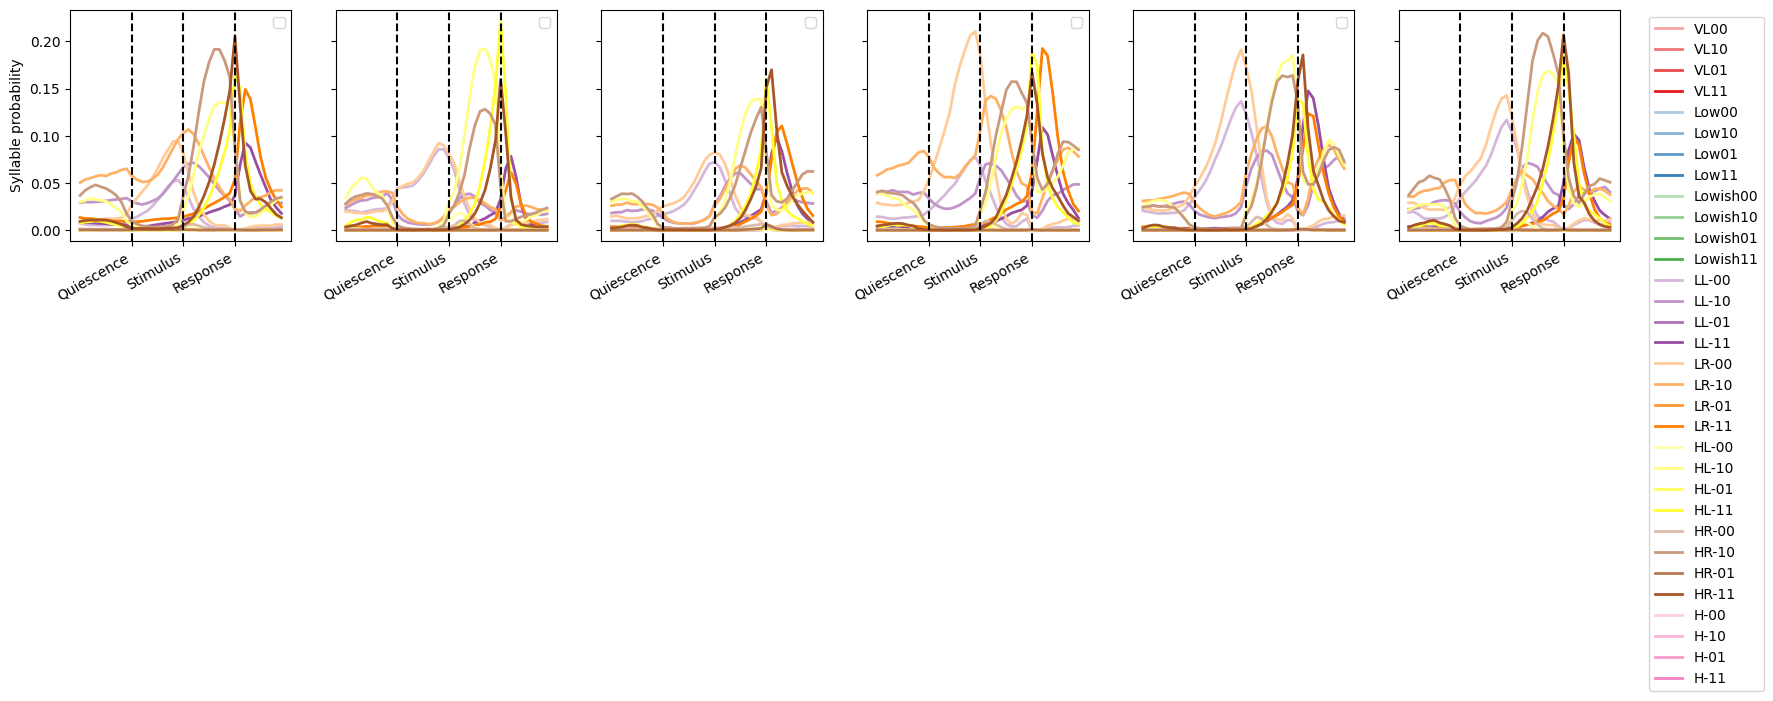

In [40]:
palette_16 = create_grouped_gradient_palette(n_groups=2, shades_per_group=4, base_palette='Set1')
palette_16_list = [palette_16(i) for i in range(palette_16.N)]  # Extract colors properly
state_to_color = dict(zip(order, palette_16_list))

fig, axs = plt.subplots(1, 6, sharex=True, sharey=True, figsize=(20, 3))

for c, cluster in enumerate(np.unique(clusters)):
    use_data = reshaped_probs.loc[reshaped_probs['cluster']==cluster]
    use_data['syllable'] = rename_func(use_data['syllable'])
    use_syllables = ['VL00', 'VL10', 'VL01', 'VL11', 'Low00', 'Low10',  'Low01', 'Low11']
    use_data = use_data.loc[use_data['syllable'].isin(use_syllables)]
    sns.lineplot(x='timestep', y='prob', hue='syllable', data=use_data, 
                ax=axs[c], palette=palette_30_list, hue_order=labels, linewidth=2)  #  legend=labels[c]

    axs[c].axvline(x=10, color='k', linestyle='--')
    axs[c].axvline(x=20, color='k', linestyle='--')
    axs[c].axvline(x=30, color='k', linestyle='--')
    axs[c].set_ylabel('Syllable probability')
    axs[c].set_xlabel('')
    axs[c].set_xticks(np.arange(10, 31, 10), ['Quiescence', 'Stimulus', 'Response'], rotation=30, ha='right')
    axs[c].legend('')
axs[c].legend(loc='upper left', bbox_to_anchor=(1.1, 1))

fig, axs = plt.subplots(1, 6, sharex=True, sharey=True, figsize=(20, 3))
for c, cluster in enumerate(np.unique(clusters)):
    use_data = reshaped_probs.loc[reshaped_probs['cluster']==cluster]
    use_data['syllable'] = rename_func(use_data['syllable'])
    use_syllables = ['Lowish00', 'Lowish10', 'Lowish01', 'Lowish11', 'H-00', 'H-10', 'H-01', 'H-11']
    use_data = use_data.loc[use_data['syllable'].isin(use_syllables)]
    sns.lineplot(x='timestep', y='prob', hue='syllable', data=use_data, 
                ax=axs[c], palette=palette_30_list, hue_order=labels, linewidth=2)  #  legend=labels[c]

    axs[c].axvline(x=10, color='k', linestyle='--')
    axs[c].axvline(x=20, color='k', linestyle='--')
    axs[c].axvline(x=30, color='k', linestyle='--')
    axs[c].set_ylabel('Syllable probability')
    axs[c].set_xlabel('')
    axs[c].set_xticks(np.arange(10, 31, 10), ['Quiescence', 'Stimulus', 'Response'], rotation=30, ha='right')
    axs[c].legend('')
axs[c].legend(loc='upper left', bbox_to_anchor=(1.1, 1))


fig, axs = plt.subplots(1, 6, sharex=True, sharey=True, figsize=(20, 3))
for c, cluster in enumerate(np.unique(clusters)):
    use_data = reshaped_probs.loc[reshaped_probs['cluster']==cluster]
    use_data['syllable'] = rename_func(use_data['syllable'])
    use_syllables = ['LL-00', 'LL-10', 'LL-01', 'LL-11', 'LR-00', 'LR-10', 'LR-01', 'LR-11']
    use_data = use_data.loc[use_data['syllable'].isin(use_syllables)]
    sns.lineplot(x='timestep', y='prob', hue='syllable', data=use_data, 
                ax=axs[c], palette=palette_30_list, hue_order=labels, linewidth=2)  #  legend=labels[c]

    axs[c].axvline(x=10, color='k', linestyle='--')
    axs[c].axvline(x=20, color='k', linestyle='--')
    axs[c].axvline(x=30, color='k', linestyle='--')
    axs[c].set_ylabel('Syllable probability')
    axs[c].set_xlabel('')
    axs[c].set_xticks(np.arange(10, 31, 10), ['Quiescence', 'Stimulus', 'Response'], rotation=30, ha='right')
    axs[c].legend('')
axs[c].legend(loc='upper left', bbox_to_anchor=(1.1, 1))


fig, axs = plt.subplots(1, 6, sharex=True, sharey=True, figsize=(20, 3))
for c, cluster in enumerate(np.unique(clusters)):
    use_data = reshaped_probs.loc[reshaped_probs['cluster']==cluster]
    use_data['syllable'] = rename_func(use_data['syllable'])
    use_syllables = ['HL-00', 'HL-10', 'HL-01', 'HL-11', 'HR-00', 'HR-10', 'HR-01', 'HR-11']
    use_data = use_data.loc[use_data['syllable'].isin(use_syllables)]
    sns.lineplot(x='timestep', y='prob', hue='syllable', data=use_data, 
                ax=axs[c], palette=palette_30_list, hue_order=labels, linewidth=2)  #  legend=labels[c]

    axs[c].axvline(x=10, color='k', linestyle='--')
    axs[c].axvline(x=20, color='k', linestyle='--')
    axs[c].axvline(x=30, color='k', linestyle='--')
    axs[c].set_ylabel('Syllable probability')
    axs[c].set_xlabel('')
    axs[c].set_xticks(np.arange(10, 31, 10), ['Quiescence', 'Stimulus', 'Response'], rotation=30, ha='right')
    axs[c].legend('')
axs[c].legend(loc='upper left', bbox_to_anchor=(1.1, 1))

fig, axs = plt.subplots(1, 6, sharex=True, sharey=True, figsize=(20, 3))
for c, cluster in enumerate(np.unique(clusters)):
    use_data = reshaped_probs.loc[reshaped_probs['cluster']==cluster]
    use_data['syllable'] = rename_func(use_data['syllable'])
    use_syllables = ['LL-00', 'LL-10', 'LL-01', 'LL-11', 'LR-00', 'LR-10', 'LR-01', 'LR-11',
                     'HL-00', 'HL-10', 'HL-01', 'HL-11', 'HR-00', 'HR-10', 'HR-01', 'HR-11']
    use_data = use_data.loc[use_data['syllable'].isin(use_syllables)]
    sns.lineplot(x='timestep', y='prob', hue='syllable', data=use_data, 
                ax=axs[c], palette=palette_30_list, hue_order=labels, linewidth=2)  #  legend=labels[c]

    axs[c].axvline(x=10, color='k', linestyle='--')
    axs[c].axvline(x=20, color='k', linestyle='--')
    axs[c].axvline(x=30, color='k', linestyle='--')
    axs[c].set_ylabel('Syllable probability')
    axs[c].set_xlabel('')
    axs[c].set_xticks(np.arange(10, 31, 10), ['Quiescence', 'Stimulus', 'Response'], rotation=30, ha='right')
    axs[c].legend('')
axs[c].legend(loc='upper left', bbox_to_anchor=(1.1, 1))


/tmp/ipykernel_3392/2453833915.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_data['syllable'] = rename_func(use_data['syllable'])
/tmp/ipykernel_3392/2453833915.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_data['syllable'] = rename_func(use_data['syllable'])
/tmp/ipykernel_3392/2453833915.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

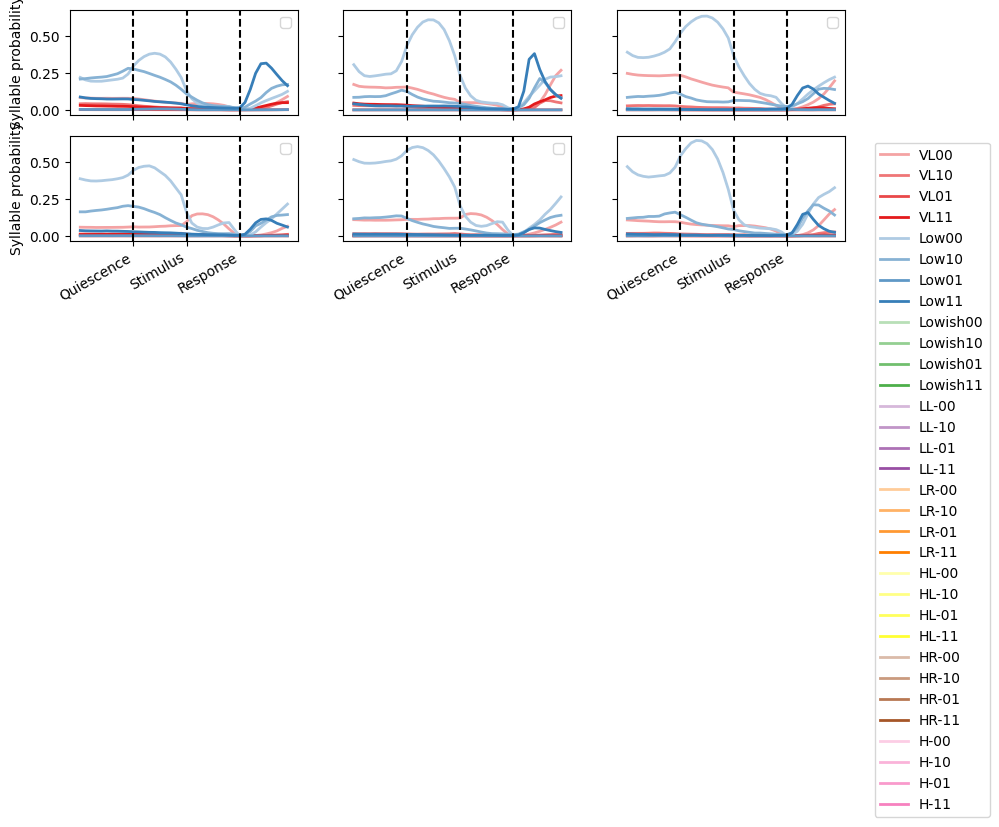

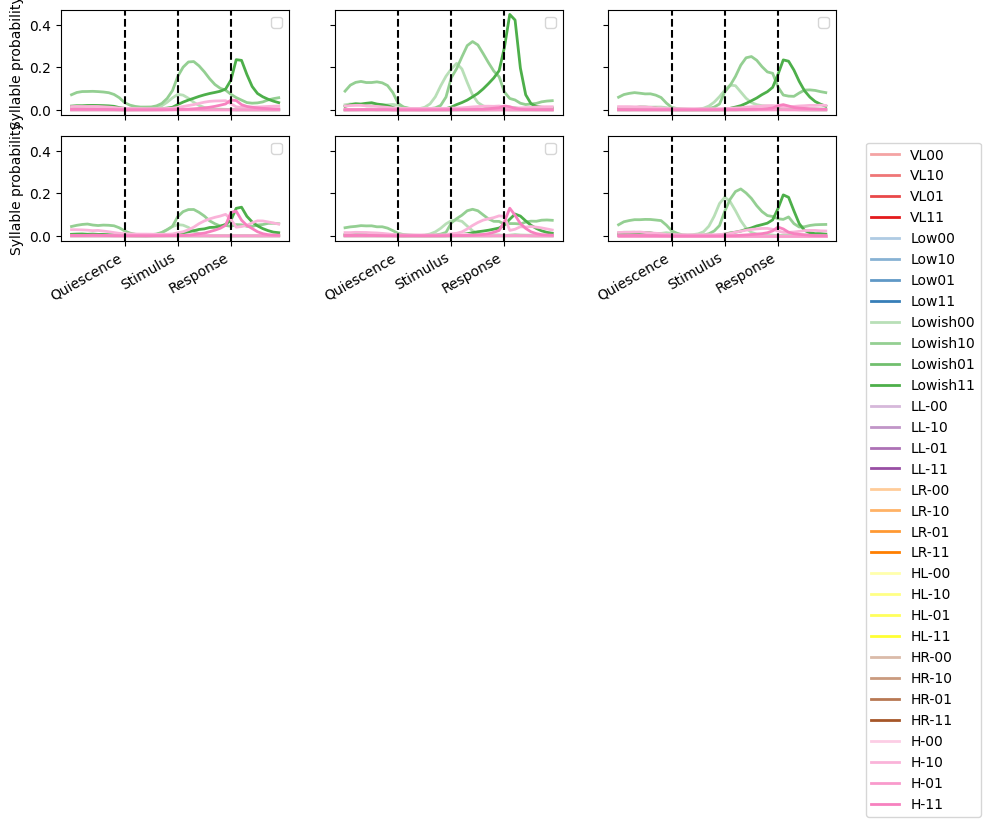

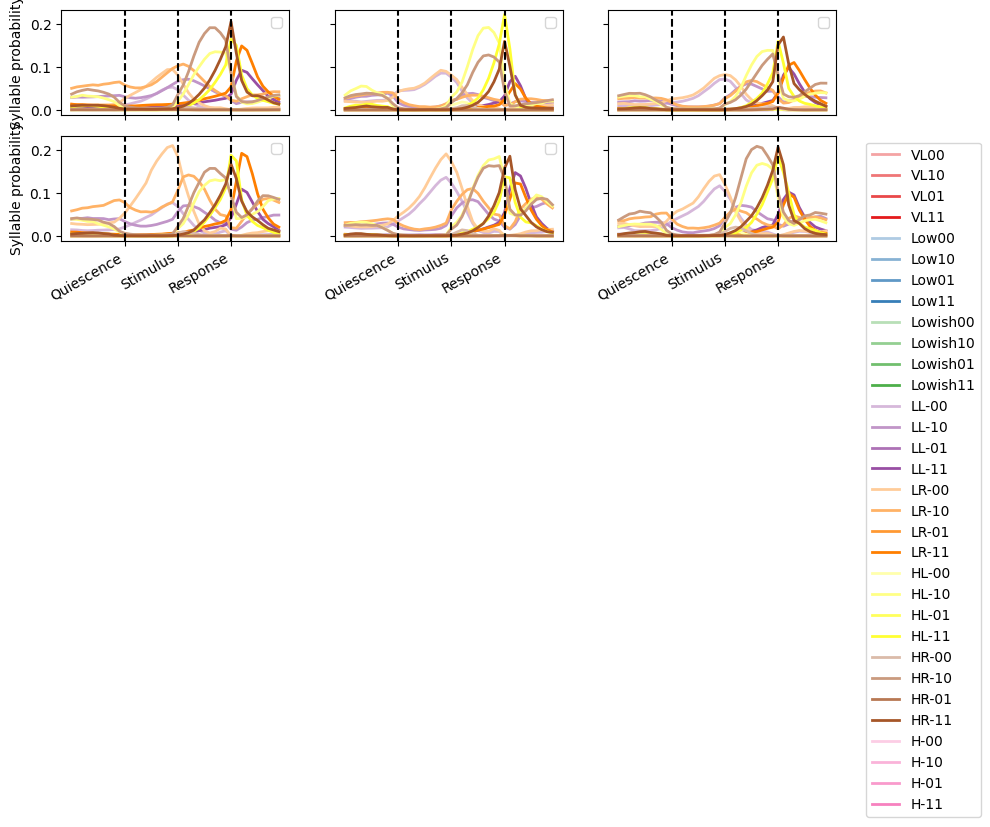

In [37]:
palette_16 = create_grouped_gradient_palette(n_groups=2, shades_per_group=4, base_palette='Set1')
palette_16_list = [palette_16(i) for i in range(palette_16.N)]  # Extract colors properly
state_to_color = dict(zip(order, palette_16_list))

fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(10, 3))
ax_x = [0, 0, 0, 1, 1, 1]
ax_y = [0, 1, 2, 0, 1, 2]
for c, cluster in enumerate(np.unique(clusters)):
    use_data = reshaped_probs.loc[reshaped_probs['cluster']==cluster]
    use_data['syllable'] = rename_func(use_data['syllable'])
    use_syllables = ['VL00', 'VL10', 'VL01', 'VL11', 'Low00', 'Low10',  'Low01', 'Low11']
    use_data = use_data.loc[use_data['syllable'].isin(use_syllables)]
    sns.lineplot(x='timestep', y='prob', hue='syllable', data=use_data, 
                ax=axs[ax_x[c], ax_y[c]], palette=palette_30_list, hue_order=labels, linewidth=2)  #  legend=labels[c]

    axs[ax_x[c], ax_y[c]].axvline(x=10, color='k', linestyle='--')
    axs[ax_x[c], ax_y[c]].axvline(x=20, color='k', linestyle='--')
    axs[ax_x[c], ax_y[c]].axvline(x=30, color='k', linestyle='--')
    axs[ax_x[c], ax_y[c]].set_ylabel('Syllable probability')
    axs[ax_x[c], ax_y[c]].set_xlabel('')
    axs[ax_x[c], ax_y[c]].set_xticks(np.arange(10, 31, 10), ['Quiescence', 'Stimulus', 'Response'], rotation=30, ha='right')
    axs[ax_x[c], ax_y[c]].legend('')
axs[ax_x[c], ax_y[c]].legend(loc='upper left', bbox_to_anchor=(1.1, 1))


palette_16 = create_grouped_gradient_palette(n_groups=2, shades_per_group=4, base_palette='Set1')
palette_16_list = [palette_16(i) for i in range(palette_16.N)]  # Extract colors properly
state_to_color = dict(zip(order, palette_16_list))
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(10, 3))
for c, cluster in enumerate(np.unique(clusters)):
    use_data = reshaped_probs.loc[reshaped_probs['cluster']==cluster]
    use_data['syllable'] = rename_func(use_data['syllable'])
    use_syllables = ['Lowish00', 'Lowish10', 'Lowish01', 'Lowish11', 'H-00', 'H-10', 'H-01', 'H-11']
    use_data = use_data.loc[use_data['syllable'].isin(use_syllables)]
    sns.lineplot(x='timestep', y='prob', hue='syllable', data=use_data, 
                ax=axs[ax_x[c], ax_y[c]], palette=palette_30_list, hue_order=labels, linewidth=2)  #  legend=labels[c]

    axs[ax_x[c], ax_y[c]].axvline(x=10, color='k', linestyle='--')
    axs[ax_x[c], ax_y[c]].axvline(x=20, color='k', linestyle='--')
    axs[ax_x[c], ax_y[c]].axvline(x=30, color='k', linestyle='--')
    axs[ax_x[c], ax_y[c]].set_ylabel('Syllable probability')
    axs[ax_x[c], ax_y[c]].set_xlabel('')
    axs[ax_x[c], ax_y[c]].set_xticks(np.arange(10, 31, 10), ['Quiescence', 'Stimulus', 'Response'], rotation=30, ha='right')
    axs[ax_x[c], ax_y[c]].legend('')
axs[ax_x[c], ax_y[c]].legend(loc='upper left', bbox_to_anchor=(1.1, 1))

palette_16 = create_grouped_gradient_palette(n_groups=4, shades_per_group=4, base_palette='Set1')
palette_16_list = [palette_16(i) for i in range(palette_16.N)]  # Extract colors properly
state_to_color = dict(zip(order, palette_16_list))
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(10, 3))
for c, cluster in enumerate(np.unique(clusters)):
    use_data = reshaped_probs.loc[reshaped_probs['cluster']==cluster]
    use_data['syllable'] = rename_func(use_data['syllable'])
    use_syllables = ['LL-00', 'LL-10', 'LL-01', 'LL-11', 'LR-00', 'LR-10', 'LR-01', 'LR-11', 
         'HL-00', 'HL-10', 'HL-01', 'HL-11', 'HR-00', 'HR-10', 'HR-01', 'HR-11']
    use_data = use_data.loc[use_data['syllable'].isin(use_syllables)]
    sns.lineplot(x='timestep', y='prob', hue='syllable', data=use_data, 
                ax=axs[ax_x[c], ax_y[c]], palette=palette_30_list, hue_order=labels, linewidth=2)  #  legend=labels[c]

    axs[ax_x[c], ax_y[c]].axvline(x=10, color='k', linestyle='--')
    axs[ax_x[c], ax_y[c]].axvline(x=20, color='k', linestyle='--')
    axs[ax_x[c], ax_y[c]].axvline(x=30, color='k', linestyle='--')
    axs[ax_x[c], ax_y[c]].set_ylabel('Syllable probability')
    axs[ax_x[c], ax_y[c]].set_xlabel('')
    axs[ax_x[c], ax_y[c]].set_xticks(np.arange(10, 31, 10), ['Quiescence', 'Stimulus', 'Response'], rotation=30, ha='right')
    axs[ax_x[c], ax_y[c]].legend('')
axs[ax_x[c], ax_y[c]].legend(loc='upper left', bbox_to_anchor=(1.1, 1))


/tmp/ipykernel_3392/3618640292.py:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='timestep', y='prob', data=importances_syllable.loc[importances_syllable['cluster']==c],
/tmp/ipykernel_3392/3618640292.py:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='timestep', y='prob', data=importances_syllable.loc[importances_syllable['cluster']==c],
/tmp/ipykernel_3392/3618640292.py:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='timestep', y='prob', data=importances_syllable.loc[importances_syllable['cluster']==c],
/tmp/ipykernel_3392/3618640292.py:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='timestep', y='prob', data=importances_syllable.loc[importances_syllable['cluster']==c],
/tmp/ipykernel_3392/3618640292.py:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
 

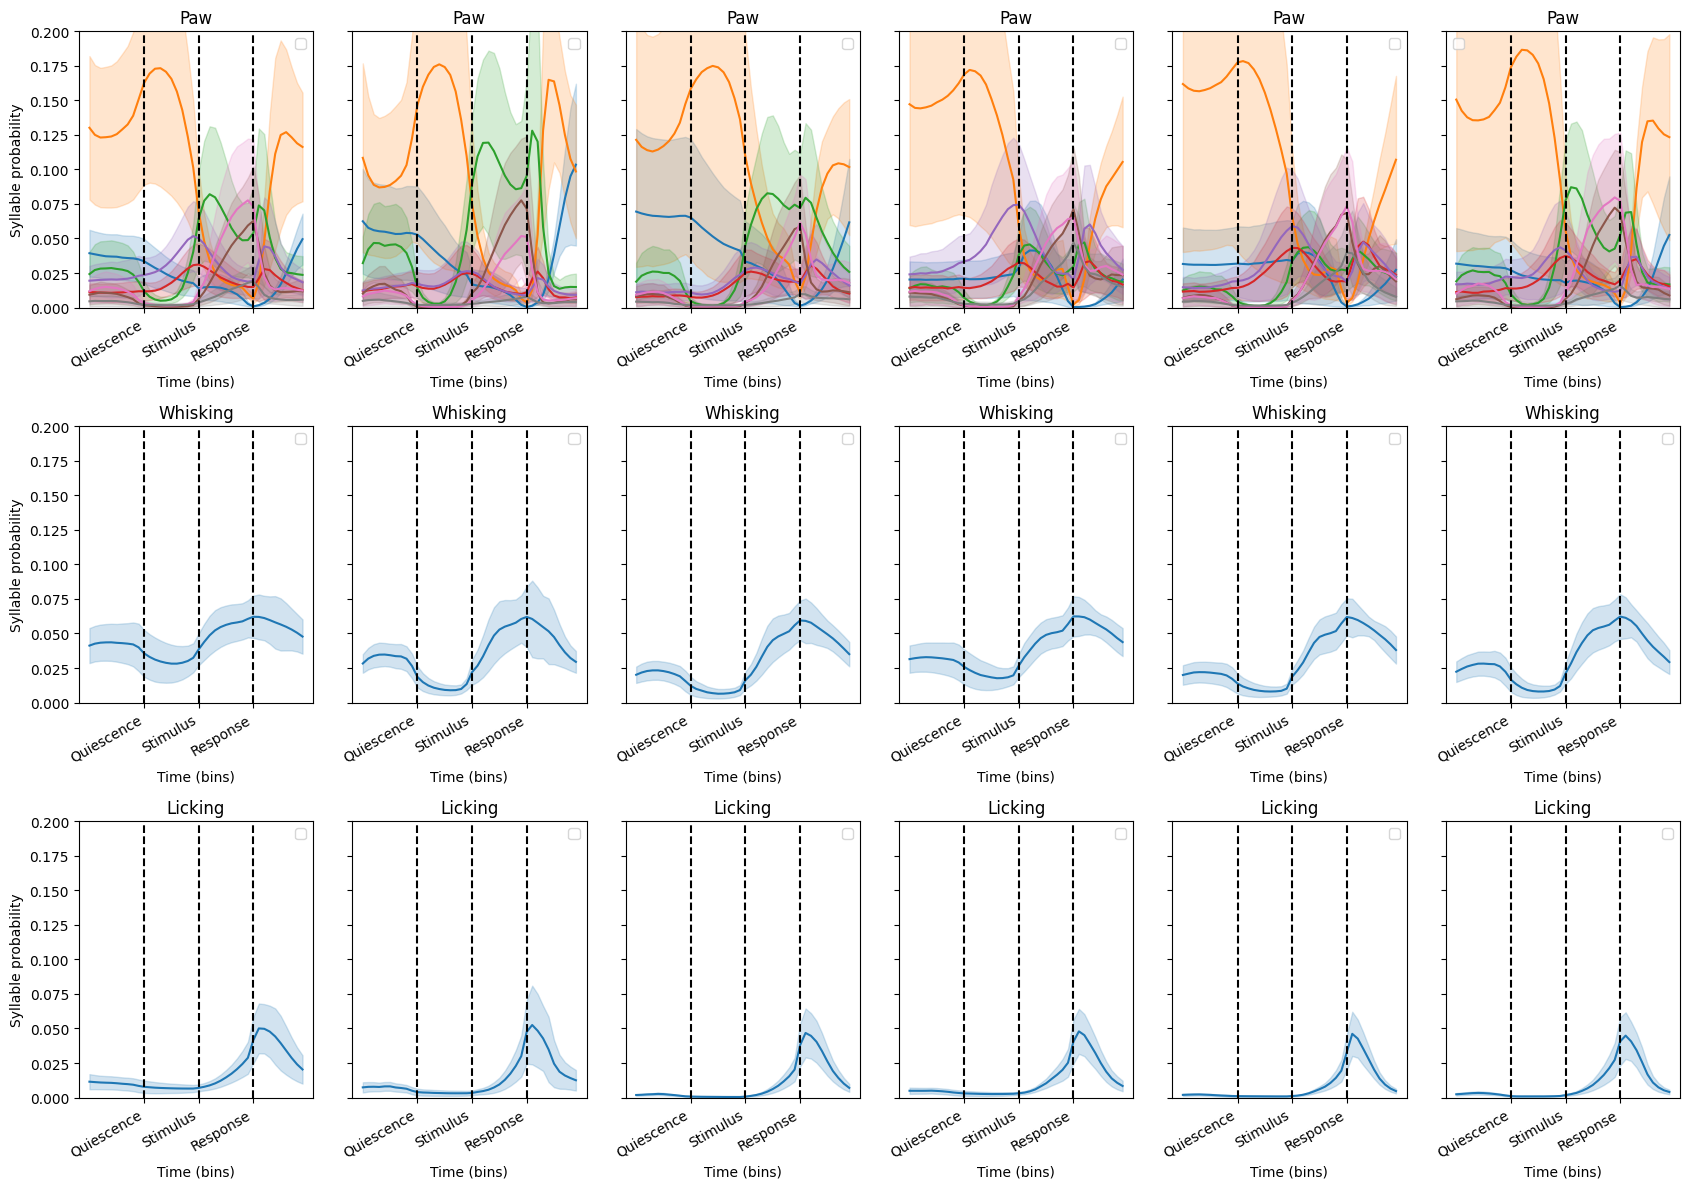

In [23]:
epoch_to_analyse = ['Pre-quiescence', 'Quiescence', 'Choice', 'ITI']

color = sns.color_palette("Set1", 8, as_cmap=False)
palette_16 = create_grouped_gradient_palette(n_groups=8, shades_per_group=1, base_palette='Set1')
color = [palette_16(i) for i in range(palette_16.N)]  # Extract colors properly
fig, axs = plt.subplots(3, len(np.unique(clusters)), sharex=False, sharey=True, figsize=(17, 12))
syllables = np.array([[int(d) for d in s] for s in reshaped_probs['syllable']])
titles = ['Paw', 'Whisking', 'Licking']
for c in range(len(np.unique(clusters))):
    for i in range(3):
        unique_syllable_digits = np.unique(syllables[:, i])
        # if i == 0:
        #     unique_syllable_digits = np.sort(paw_func(unique_syllable_digits))
        for u in unique_syllable_digits:
            if len(unique_syllable_digits)==2 and u == 0:
                continue
            syllable_interest = np.where(syllables[:, i]==u)
            importances_syllable = reshaped_probs.reset_index().loc[syllable_interest]
            # remapped_paw_syllable = paw_func(u)
            remapped_paw_syllable = u
            # sns.lineplot(x='timestep', y='prob', data=importances_syllable.loc[importances_syllable['cluster']==c], 
            #     ax=axs[i, c], errorbar='se', palette=color[u], label=str(remapped_paw_syllable))
            sns.lineplot(x='timestep', y='prob', data=importances_syllable.loc[importances_syllable['cluster']==c], 
                ax=axs[i, c], errorbar='se', palette=color, label=str(remapped_paw_syllable))
        axs[i, c].set_title(titles[i])
        axs[i, c].set_ylim([0, 0.2])
        axs[i, c].set_xlabel('Time (bins)')
        axs[i, c].set_ylabel('Syllable probability')
        axs[i, c].axvline(x=10, color='k', linestyle='--')
        axs[i, c].axvline(x=20, color='k', linestyle='--')
        axs[i, c].axvline(x=30, color='k', linestyle='--')
        # axs[i, c].legend(loc='upper left', bbox_to_anchor=(1.1, 1))
        axs[i, c].legend('')
        axs[i, c].set_xticks(np.arange(10, 31, 10), ['Quiescence', 'Stimulus', 'Response'], rotation=30, ha='right')
plt.tight_layout()

## Plot histograms per cluster

In [12]:
optimal_k = 8
if optimal_k == 8:
    identifiable_mapping = {'000': 0.0,
           '100': 1.0,
           '200': 2.0,
           '300': 3.0,
           '400': 4.0,
           '500': 5.0,
           '600': 6.0,
           '700': 7.0,
           
           '010': 8.0,
           '110': 9.0,
           '210': 10.0,
           '310': 11.0,
           '410': 12.0,
           '510': 13.0,
           '610': 14.0,
           '710': 15.0,

           '001': 16.0,
           '101': 17.0,
           '201': 18.0,
           '301': 19.0, 
           '401': 20.0, 
           '501': 21.0, 
           '601': 22.0, 
           '701': 23.0, 

           '011': 24.0,
           '111': 25.0,
           '211': 26.0,
           '311': 27.0,
           '411': 28.0,
           '511': 29.0,
           '611': 30.0,
           '711': 31.0,
           'nan': np.nan
           }
    # paw_mapping = {0:4, 1:1, 2:5, 3:7, 4:6, 5:2, 6:0, 7:3}
    paw_mapping = {0:1, 1:5, 2:3, 3:0, 4:6, 5:4, 6:7, 7:2}  # original

elif optimal_k == 5:
    identifiable_mapping = {'000': 0.0,
           '100': 1.0,
           '200': 2.0,
           '300': 3.0,
           '400': 4.0,
           
           '010': 5.0,
           '110': 6.0,
           '210': 7.0,
           '310': 8.0,
           '410': 9.0,

           '001': 10.0,
           '101': 11.0,
           '201': 12.0,
           '301': 13.0, 
           '401': 14.0, 

           '011': 15.0,
           '111': 16.0,
           '211': 17.0,
           '311': 18.0,
           '411': 19.0,
           'nan': np.nan
           }
    paw_mapping = {0:1, 1:2, 2:4, 3:0, 4:3} 
inverted_mapping = {v: k for k, v in identifiable_mapping.items()}
inverted_func = np.vectorize(inverted_mapping.get)

In [13]:
palette_16 = create_grouped_gradient_palette(n_groups=8, shades_per_group=4, base_palette='Set1')
palette_16_list = [palette_16(i) for i in range(palette_16.N)]  # Extract colors properly
ordered_identifiable = ['000', '010', '001', '011',
                        '100', '110', '101', '111', 
                        '200', '210', '201', '211',
                        '300', '310', '301', '311',
                        '400', '410', '401', '411',  
                        '500', '510', '501', '511',
                        '600', '610', '601', '611',
                        '700', '710', '701', '711'
                   ]
ordered_numbers = np.arange(0, 32, 1)
rename_labels = dict(zip(np.array(ordered_identifiable), np.array(ordered_numbers)))
rename_func = np.vectorize(rename_labels.get)

In [14]:
sessions_to_process = all_sequences['session'].unique()
new_sequences = all_sequences.merge(full_session_syllables[['session', 'session_cluster']], on='session')
epoch_to_analyse = ['Pre-quiescence', 'Quiescence', 'Choice', 'ITI']
hvormye = 10
fig, axs = plt.subplots(hvormye, len(np.unique(final_clusters)), sharex=False, sharey=False, figsize=(6, hvormye))

for c, cluster in enumerate(range(len(np.unique(final_clusters)))):
    cluster_sessions = np.random.choice(new_sequences.loc[new_sequences['session_cluster']==cluster, 'session'].unique(), hvormye, replace=False)
    for m, mat in enumerate(cluster_sessions):
        session = mat
        mouse_data = new_sequences.loc[(new_sequences['session']==session) & (new_sequences['session_cluster']==cluster)]
        bound = int(np.shape(mouse_data)[0]/4)
        mouse_seq = np.ones((bound, 40)) * np.nan
        all_epochs = []
        try:
            for e, epoch in enumerate(epoch_to_analyse):
                epoch_data = np.vstack(mouse_data.loc[mouse_data['broader_label']==epoch, 'binned_sequence'].values)[:bound, :]
                epoch_data = inverted_func(epoch_data)
                epoch_data = rename_func(epoch_data)
                if e == 0:
                    all_epochs = epoch_data[:bound-50, :]
                else:
                    all_epochs = np.concatenate([all_epochs, epoch_data[:bound-50, :]], axis=1)
            # sorted = all_epochs[np.argsort([ordered_dict[row[0]] for row in all_epochs])]
            axs[m, c].imshow(np.sort(all_epochs, axis=0), aspect='auto', cmap=palette_16, interpolation=None, alpha=0.8)
            axs[m, c].set_xticks([], [])
            axs[m, c].set_yticks([], [])
        except:
             axs[m, c].set_xticks([], [])
             axs[m, c].set_yticks([], [])
             print(mat)
plt.tight_layout()
plt.show()

NameError: name 'full_session_syllables' is not defined